# Check full Spectrum  for no filter date 2023/01/2023 PSF2DFFM


- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 24th 2023
- last update : January 24th 2023




# Import

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle


In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [4]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')
# pysynphot
import pysynphot as S
S.refs.setref(area=1)
S.refs.getref()

{'graphtable': '/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits',
 'comptable': '/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits',
 'thermtable': '/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits',
 'area': 1,
 'waveset': 'Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True'}

In [5]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

import argparse

import logging
import coloredlogs
import configparser


In [6]:
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import fftpack

/Users/dagoret/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# import libradtran
sys.path.append('../../../simulation/atmsim/libradtran')
import libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [8]:
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES

In [9]:
HALPHA = Line(656.3, atmospheric=False, label='$H\\alpha$', label_pos=[-0.01, 0.02], use_for_calibration=True)
HBETA = Line(486.3, atmospheric=False, label='$H\\beta$', label_pos=[0.001, 0.02], use_for_calibration=True)
HGAMMA = Line(434.0, atmospheric=False, label='$H\\gamma$', label_pos=[0.001, 0.02], use_for_calibration=True)
HDELTA = Line(410.2, atmospheric=False, label='$H\\delta$', label_pos=[0.001, 0.02], use_for_calibration=True)
HEPSILON = Line(397.0, atmospheric=False, label='$H\\epsilon$', label_pos=[0.001, 0.02], use_for_calibration=True)

HZETA = Line(388.9064, atmospheric=False, label='$H\\zeta$', label_pos=[0.001, 0.02], use_for_calibration=False)
HETA = Line(383.5397, atmospheric=False, label='$H\\eta$', label_pos=[0.001, 0.02], use_for_calibration=False)

HBETA2 = Line(486.3*2, atmospheric=False, label='$H\\beta$2', label_pos=[0.001, 0.02], use_for_calibration=True)
HGAMMA2 = Line(434.0*2, atmospheric=False, label='$H\\gamma$2', label_pos=[0.001, 0.02], use_for_calibration=True)
HDELTA2 = Line(410.2*2, atmospheric=False, label='$H\\delta$2', label_pos=[0.001, 0.02], use_for_calibration=True)
HEPSILON2 = Line(397.0*2, atmospheric=False, label='$H\\epsilon$2', label_pos=[0.001, 0.02], use_for_calibration=True)
HZETA2 = Line(388.9064*2, atmospheric=False, label='$H\\zeta$2', label_pos=[0.001, 0.02], use_for_calibration=False)
HETA2 = Line(383.5397*2, atmospheric=False, label='$H\\eta$2', label_pos=[0.001, 0.02], use_for_calibration=False)

O2_1 = Line(760.3, atmospheric=True, label='$O_2$',label_pos=[0.001, 0.02], use_for_calibration=True)  # libradtran paper fig.3
O2_2 = Line(763.1, atmospheric=True, label='$O_2$',label_pos=[0.001, 0.02], use_for_calibration=True)  # libradtran paper fig.3

O2B = Line(687.472, atmospheric=True, label=r'$O_2(B)$',  # 687.472 is a weighted average of the O2B line simulated by Libradtran
           label_pos=[0.001, 0.02], use_for_calibration=True)  # https://en.wikipedia.org/wiki/Fraunhofer_lines
O2Y = Line(898.765, atmospheric=True, label=r'$O_2(Y)$',
           label_pos=[0.001, 0.02])  # https://en.wikipedia.org/wiki/Fraunhofer_lines
O2Z = Line(822.696, atmospheric=True, label=r'$O_2(Z)$',
           label_pos=[0.001, 0.02])  # https://en.wikipedia.org/wiki/Fraunhofer_lines
# H2O = Line( 960,atmospheric=True,label='$H_2 O$',label_pos=[0.007,0.02],width_bounds=(1,50))  #
H2O_1 = Line(935, atmospheric=True, label=r'$H_2 O$', label_pos=[0.001, 0.02],  # MFL: don't these need different labels?
             width_bounds=[5, 30])  # libradtran paper fig.3, broad line
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.001, 0.02],  # MFL: don't these need different labels?
              width_bounds=[5, 30])  # libradtran paper fig.3, broad line
ATMOSPHERIC_LINES = [O2_1, O2_2, O2B, O2Y, O2Z, H2O_1]


H2O_1 = Line(935, atmospheric=True, label=r'$H_2 O$', label_pos=[0.001, 0.02],  # MFL: don't these need different labels?
             width_bounds=[5, 30])  # libradtran paper fig.3, broad line
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

my_calib_lines_etador = Lines([HALPHA,HBETA,HGAMMA,HDELTA,HEPSILON,HBETA2,HGAMMA2,HDELTA2,HEPSILON2,HZETA2,O2_1,O2_2],hydrogen_only=True,atmospheric_lines=True, redshift=0, emission_spectrum=False)
hydrogen_lines_order1 =  Lines([HALPHA,HBETA,HGAMMA,HDELTA,HEPSILON])
hydrogen_lines_order2 =  Lines([HBETA2,HGAMMA2,HDELTA2,HEPSILON2,HZETA2,HETA2])
oxygen_lines_order1 = Lines([O2_1,O2_2])

In [10]:
#ax.plot([x_O2_1,x_O2_1],[72,100],'b-',lw=3)
#ax.annotate(O2_1.label, xy=(x_O2_1, 80), color='b',fontsize=20,fontweight='bold')

# Functions

- filtering here

https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

In [11]:
def smooth_data_convolve_my_average(arr, span):
    re = np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode="same")

    # The "my_average" part: shrinks the averaging window on the side that 
    # reaches beyond the data, keeps the other side the same size as given 
    # by "span"
    re[0] = np.average(arr[:span])
    for i in range(1, span + 1):
        re[i] = np.average(arr[:i + span])
        re[-i] = np.average(arr[-i - span:])
    return re

def smooth_data_np_average(arr, span):  # my original, naive approach
    return [np.average(arr[val - span:val + span + 1]) for val in range(len(arr))]

def smooth_data_np_convolve(arr, span):
    return np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode="same")

def smooth_data_np_cumsum_my_average(arr, span):
    cumsum_vec = np.cumsum(arr)
    moving_average = (cumsum_vec[2 * span:] - cumsum_vec[:-2 * span]) / (2 * span)

    # The "my_average" part again. Slightly different to before, because the
    # moving average from cumsum is shorter than the input and needs to be padded
    front, back = [np.average(arr[:span])], []
    for i in range(1, span):
        front.append(np.average(arr[:i + span]))
        back.insert(0, np.average(arr[-i - span:]))
    back.insert(0, np.average(arr[-2 * span:]))
    return np.concatenate((front, moving_average, back))

def smooth_data_lowess(arr, span):
    x = np.linspace(0, 1, len(arr))
    return sm.nonparametric.lowess(arr, x, frac=(5*span / len(arr)), return_sorted=False)

def smooth_data_kernel_regression(arr, span):
    # "span" smoothing parameter is ignored. If you know how to 
    # incorporate that with kernel regression, please comment below.
    kr = KernelReg(arr, np.linspace(0, 1, len(arr)), 'c')
    return kr.fit()[0]

def smooth_data_savgol_0(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 0)

def smooth_data_savgol_1(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 1)

def smooth_data_savgol_2(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 2)

def smooth_data_fft(arr, span):  # the scaling of "span" is open to suggestions
    w = fftpack.rfft(arr)
    spectrum = w ** 2
    cutoff_idx = spectrum < (spectrum.max() * (1 - np.exp(-span / 2000)))
    w[cutoff_idx] = 0
    return fftpack.irfft(w)

In [12]:
def atmpatt_Dataf_to_np(df):
    """
    
    atmpatt_Dataf_to_np : convert pandas dtaframe on abs pattern into numpy array
    
    """
    o2_cols = []
    for tabcol in df.columns:
        if 'o2_' in tabcol and 'no2_' not in tabcol:
            o2_cols.append(tabcol)
            
    no2_cols = []
    for tabcol in df.columns:
        if 'no2_' in tabcol:
            no2_cols.append(tabcol)
            
            
    h2o_cols = []
    for tabcol in df.columns:
        if 'h2o_' in tabcol:
            h2o_cols.append(tabcol)
            
            
    o3_cols = []
    for tabcol in df.columns:
        if 'o3_' in  tabcol:
            o3_cols.append(tabcol)
            
            
    data_wl = df["wl"].to_numpy()
    data_o2 = df[o2_cols].to_numpy()
    data_o3 = df[o3_cols].to_numpy()
    data_h2o = df[h2o_cols].to_numpy()
    data_no2 = df[no2_cols].to_numpy()
    
    
    return data_wl, data_o2, data_o3, data_h2o, data_no2
    
    

In [13]:
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx],int(idx)

In [14]:
def GetSpectra(dict_spectra,factor=1.):
    """
    GetSpectra(dict_spectra)
    
    input:
      - dict_spectra : dictionnary of input spectra
      
      
      {'number': 238.0, 'object': 'mu. Col', 'dateobs': '2022-03-18T00:51:22.049', 'refhour': 0.0, 'airmass': 1.11557476948966, 'pressure': 743.45, 'temperature': 8.9, 
      'humidity': 48.0, 'targetx_pix': 312.7442668572934, 'targety_pix': 1738.0006619324693, 'rotangle': 0.1753951396614214, 'd2ccd': 181.0974436798836, 
      'all_lambdas': array([ 302.20970512,  302.91544585,  303.62117594, ..., 1108.67461764,
       1109.35162338, 1110.02859124]), 'all_fluxes': array([1.04110833e-13, 9.83856109e-14, 8.99209206e-14, ...,
       5.34113538e-13, 5.36905940e-13, 5.53127394e-13]), 'all_fluxes_err': array([3.51303583e-15, 3.10100695e-15, 2.58677333e-15, ...,
       3.34568263e-15, 4.01784054e-15, 4.54242555e-15]), 'all_lambdas_order2': array([ 302.24857475,  302.9543149 ,  303.66004442, ..., 1108.71192607,
       1109.38892974, 1110.06589555]), 'all_fluxes_order2': array([420.23653349, 386.95227531, 344.90384603, ...,  60.47440612,
        60.74615545,  62.53491353]), 'all_fluxes_err_order2': array([14.15542468, 12.17674916,  9.90751987, ...,  0.37846535,
        0.45415764,  0.51307916])}
      
    
    return
      - list of dataframes
    """
    
    #correction_area = 1.06/1.13
    correction_area = 1
    
    list_of_columns = ["number","object",'dateobs','refhour','airmass','pressure','temperature','humidity','filename','targetx_pix', 'targety_pix','rotangle', 'd2ccd']   

    all_df = []  # container for spectra
    
    df_info = pd.DataFrame(columns=list_of_columns)
    
    idx=0
    for key, value in dict_spectra.items():
        
        df_info.loc[idx] = [int(value["number"]),value["object"],value["dateobs"],value["refhour"],value["airmass"],value["pressure"],value["temperature"],value["humidity"],key,value['targetx_pix'],value['targety_pix'],value['rotangle'], value['d2ccd']]
         
        df = pd.DataFrame()
        df["all_lambdas"] = value["all_lambdas"]
        df["all_fluxes"] = value["all_fluxes"]/ correction_area*factor 
        df["all_fluxes_err"] = value["all_fluxes_err"]*factor
        
        if 'all_lambdas_order2' in value.keys():
            df["all_lambdas_order2"] = value["all_lambdas_order2"]
            df["all_fluxes_order2"] = value["all_fluxes_order2"]/ correction_area*factor 
            df["all_fluxes_err_order2"] = value["all_fluxes_err_order2"]*factor
            
        
        all_df.append(df)
        
        
        idx+=1
        
    return df_info , all_df

In [15]:
def GetSpectraFiltered(dict_spectra,list_of_bad_spectra,factor = 1.):
    """
    GetSpectraFiltered(inputdir,inputfiles)
    
    input:
      - dict_spectra
      - ist_of_bad_spectra
    
    return
      - filtered infos, filtered spectra
    """
    
    # factor to correct fluxes (over estimated collection surface)
    #correction_area = 1.06/1.13
    correction_area = 1
    
    
    
    list_of_columns = ["number","object",'dateobs','refhour','airmass','pressure','temperature','humidity','filename','targetx_pix', 'targety_pix','rotangle', 'd2ccd']   
        

    all_df = []  # container for spectra
    
    df_info = pd.DataFrame(columns=list_of_columns)
    
    idx=0       # counter on input spectra
    idx_out = 0 # counter on save spectra
    for key, value in dict_spectra.items():
        
        
        if int(value["number"]) not in list_of_bad_spectra:
        
            
            df_info.loc[idx] = [int(value["number"]),value["object"],value["dateobs"],value["refhour"],value["airmass"],value["pressure"],value["temperature"],value["humidity"],key,value['targetx_pix'],value['targety_pix'],value['rotangle'], value['d2ccd']] 
        
            df = pd.DataFrame()
            df["all_lambdas"] = value["all_lambdas"]
            df["all_fluxes"] = value["all_fluxes"]/correction_area*factor
            df["all_fluxes_err"] = value["all_fluxes_err"]*factor
        
            if 'all_lambdas_order2' in value.keys():
                df["all_lambdas_order2"] = value["all_lambdas_order2"]
                df["all_fluxes_order2"] = value["all_fluxes_order2"]/correction_area*factor
                df["all_fluxes_err_order2"] = value["all_fluxes_err_order2"]*factor
               
            all_df.append(df)
            idx_out+=1  # increase count on saved spectra
            
        else:
            num = int(value["number"])
            msg = f"Remove spectrum {idx} for exposure {num}"
            print(msg)
            
        idx+=1
            

        
    return df_info,all_df

In [16]:
def FindPairOfExposures(df):
    """
    
    Find pair of exposures at similar airmass, one before culmination, the other one after the exposure
    
    - input : pandas dataframe with infos
    - output : pandas dataframe with pairs
    
    """
    
    
 
    # the culmination  
    idx_zmin = df["airmass"].idxmin()
    
    # split this dataframe into 2
    
    # df before culmination
    df1 = df.iloc[0:idx_zmin]
    
    # df after culmination
    df2 = df.iloc[idx_zmin+1:-1]
    
    #print(df1)
    
    #print(df2)
    
    # loop on exposure before culmination
    #for irow in range(0,idx_zmin):
        # print(irow,df1.iloc[irow][["number","airmass"]])
        
    dist = np.abs(df1["airmass"][np.newaxis, :] - df2["airmass"][:, np.newaxis])
    #print(dist)
    closest_idx = np.argmin(dist, axis=0)
    closest_id = df2.iloc[closest_idx]["number"].to_numpy()
    df_output = pd.DataFrame({"idx1": np.arange(0,idx_zmin), 
                              "idx2": closest_idx+idx_zmin+1,
                              "num1":df1["number"],
                              "num2":closest_id,
                              "z1":df1["airmass"].values,
                              "z2":df2.iloc[closest_idx]["airmass"].to_numpy()})

    df_output["zdiff"] =  df_output["z2"]-df_output["z1"]
    df_output["dtime"] = df2.iloc[closest_idx]["refhour"].to_numpy()- df1["refhour"] 
    return df_output
    

In [17]:
def FindPairOfExposuresFromFirst(df):
    """
    
    - input : pandas dataframe with infos
    - output : pandas dataframe with pairs
    
    """ 
 

    idx_start = 0
    
    # split this dataframe into 2
    
    # df before culmination
    df1 = df.iloc[:idx_start+1]
    
    # df after culmination
    df2 = df.iloc[idx_start+1:]
    N2=len(df2)
    

    df1_new = df1.copy(deep=True)
    df1_new = pd.concat([df1]*(N2),axis=0)
 
    df1=df1_new
    N1=len(df1)
   
    df_output = pd.DataFrame({"idx1": np.full(N1,0), 
                              "idx2": np.arange(1,N2+1),
                              "num1":df1["number"].values,
                              "num2":df2["number"].values,
                              "z1":df1["airmass"].values,
                              "z2":df2["airmass"].values,
                              "t1":df1["refhour"].values,
                              "t2":df2["refhour"].values})

    df_output["zdiff"] =  df_output["z2"]-df_output["z1"]
    df_output["dtime"] = df_output["t2"]-df_output["t1"]
    return df1,df2,df_output
    

# Constants

# Initialisation

In [18]:
# start with logs
#-----------------
logging.basicConfig()
logging.root.setLevel(logging.NOTSET)

handle = __name__

logger = logging.getLogger(handle)
# logging.getLogger().setLevel(logging.INFO)
logger.setLevel(logging.DEBUG)

# If you don't want to see log messages from libraries, you can pass a
# specific logger object to the install() function. In this case only log
# messages originating from that logger will show up on the terminal.
coloredlogs.install(level='DEBUG', logger=logger)
coloredlogs.install(fmt='%(asctime)s,%(msecs)03d %(hostname)s %(name)s[%(process)d] %(levelname)s %(message)s')

In [19]:
# set time
# date
today = date.today()
string_date = today.strftime("%Y-%m-%d")

# time
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

tim = time.localtime()
current_time = time.strftime("%H:%M:%S", tim)

# timezones
tz_LA = pytz.timezone('America/Los_Angeles')
datetime_LA = datetime.now(tz_LA)
msg="LA time:"+  datetime_LA.strftime("%H:%M:%S")
logger.info(msg)

tz_NY = pytz.timezone('America/New_York')
datetime_NY = datetime.now(tz_NY)
msg="NY time:"+ datetime_NY.strftime("%H:%M:%S")
logger.info(msg)

tz_London = pytz.timezone('Europe/London')
datetime_London = datetime.now(tz_London)
msg="London time:"+ datetime_London.strftime("%H:%M:%S")
logger.info(msg)

tz_Paris = pytz.timezone('Europe/Paris')
datetime_Paris = datetime.now(tz_Paris)
msg="Paris time:"+ datetime_Paris.strftime("%H:%M:%S")
logger.info(msg)

msg="************************ START *********************"
logger.info(msg)


2023-01-24 16:25:08,193 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO LA time:07:25:08
2023-01-24 16:25:08,196 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO NY time:10:25:08
2023-01-24 16:25:08,198 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO London time:15:25:08
2023-01-24 16:25:08,201 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO Paris time:16:25:08
2023-01-24 16:25:08,201 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO ************************ START *********************


In [20]:
# arguments
#----------

parser = argparse.ArgumentParser()
parser.add_argument("--config",action="store", dest="configfile",help=f" run generate -config configfilename, with by ex configfilename = default.ini")
#results_args = parser.parse_args()

results_args=""


# Configuration

In [21]:
!ls config

confprog_run-auxtel-20230117-empty~holo_psf2dffm-hd185975.ini
confprog_run-auxtel-20230118-empty~holo_psf2dffm-hd185975.ini
confprog_run-auxtel-20230119-empty~holo_psf2dffm-hd185975.ini
confprog_run-auxtel.ini


In [22]:
# config file
# --------------
#configfile = "config/default.ini"
configfile = "config/confprog_run-auxtel-20230119-empty~holo_psf2dffm-hd185975.ini"
#config_filename = results_args.configfile
config_filename = configfile
msg = f"Configuration file : {config_filename}"
logger.info(msg)


2023-01-24 16:25:08,378 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO Configuration file : config/confprog_run-auxtel-20230119-empty~holo_psf2dffm-hd185975.ini


In [23]:
# 1) CONFIGURATION
#------------------
logger.info('1) Configuration')

config = configparser.ConfigParser()

if os.path.exists(config_filename):
    config.read(config_filename)
else:
    msg = f"config file {config_filename} does not exist !"
    logger.error(msg)

2023-01-24 16:25:08,387 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO 1) Configuration


In [24]:
config_section = config.sections()

In [25]:
if len(config_section) == 0:
    msg = f"empty config file {config_filename} !"
    logger.error(msg)

In [26]:
if 'GENERAL' in config_section:

    FLAG_DEBUG = bool(int(config['GENERAL']['FLAG_DEBUG']))
    FLAG_VERBOSE = bool(int(config['GENERAL']['FLAG_VERBOSE']))
    FLAG_PLOT   = bool(int(config['GENERAL']['FLAG_PLOT']))
    FLAG_PRINT  = bool(int(config['GENERAL']['FLAG_PRINT']))
    
    SITE          = config['GENERAL']['SITE']
    DATE          = config['GENERAL']['DATE']
    
    inputdir    = config['GENERAL']['inputdir']
    inputfile   = config['GENERAL']['inputfile']
    filterdisperser =  config['GENERAL']['filterdisperser']
    
    
    target      = config['GENERAL']['object']
    sedfilename = config['GENERAL']['sedfilename']
    
    filename_auxtelthroughput = config['GENERAL']['filename_auxtelthroughput']
   
    spectractormode = config['GENERAL']['spectractormode']
   
    normalisationfactor = float(config['GENERAL']['normalisationfactor'])
    
    WLMINSEL      = float(config['GENERAL']['WLMINSEL'])
    WLMAXSEL      = float(config['GENERAL']['WLMAXSEL'])
    
    
    MAGLIMMIN     = float(config['GENERAL']['MAGLIMMIN'])
    MAGLIMMAX     = float(config['GENERAL']['MAGLIMMAX'])
    FLUXLIMMIN    = float(config['GENERAL']['FLUXLIMMIN'])
    FLUXLIMMAX    = float(config['GENERAL']['FLUXLIMMAX'])    
    
    NPOINTSVIEW       =    int(config['GENERAL']['NPOINTSVIEW']) 
    NPOINTSSAVE       =    int(config['GENERAL']['NPOINTSSAVE']) 
    inputfile_linearfit =  config['GENERAL']['outputfile_linearfit']
    inputfile_gp        =  config['GENERAL']['outputfile_gp']
    
    BADEXPOS = config['GENERAL']['BADEXPOS']
    

else:
    msg = f"Configuration file : empty section GENERAL in config file {config_filename} !"   
    logger.error(msg)

In [27]:
msg=f" Object observed {target} at {SITE} ({DATE})"
logger.info(msg)

2023-01-24 16:25:08,432 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO  Object observed HD185975 at AUXTEL/Rubin Obs (2023-01-19)


In [28]:
input_file_split=inputfile.split(".")    
basefilename=input_file_split[0]
extendfilename=input_file_split[1]

In [29]:
list_of_badnums1 = [int(nn)  for nn in BADEXPOS.split()]
list_of_badnums1

[287, 216, 251, 393, 400]

In [30]:
WL= np.arange(WLMINSEL,WLMAXSEL)

# input files

## Get Calspec SED

- Notice we use a relative normalisation factor

In [31]:
s0=S.FileSpectrum(os.path.join(path_sed_calspec,sedfilename))

Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.


In [32]:
sed_w=s0.wave/10
sed_f=s0.flux*10*normalisationfactor
sed_idx=np.where(np.logical_and(sed_w> WLMINSEL ,sed_w< WLMAXSEL))[0]
sed_w=sed_w[sed_idx]
sed_f=sed_f[sed_idx]

In [33]:
# interpolation function
f_sed = interpolate.interp1d(sed_w,sed_f,bounds_error=False,fill_value="extrapolate")

In [34]:
targetname = s0.fheader['TARGETID']

In [35]:
sed_m=-2.5*np.log10(sed_f)

Text(0, 0.5, 'mag')

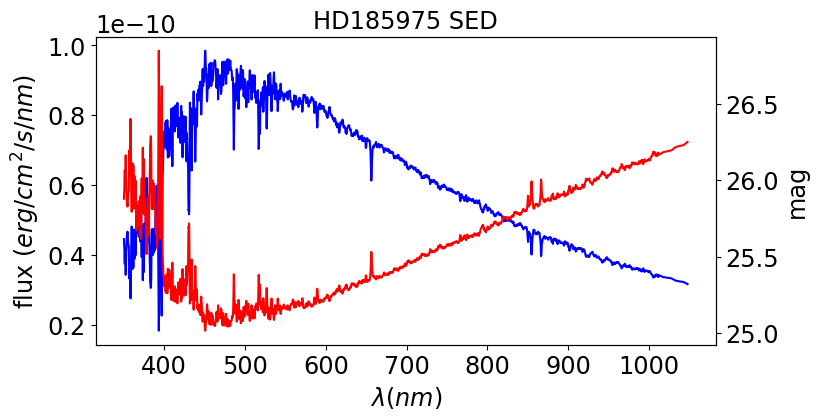

In [36]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,1,1)
ax.plot(sed_w,sed_f,'b')
ax.set_xlabel("$\\lambda (nm)$")
ax.set_ylabel("flux $(erg/cm^2/s/nm)$")
ax.set_title(targetname + " SED")
ax2=ax.twinx()
ax2.plot(sed_w,sed_m,'r-')
ax2.set_ylabel("mag")

# Simulate the atmosphere

In [37]:
am       = 1.2
pressure = 0. # use default value
pwv      = 4.0
aer      = 0.1
ozone    = 300.
cloudext = 0

In [38]:
path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,prof_str='us',proc_str='sa',cloudext=cloudext)
data = np.loadtxt(os.path.join(path,thefile))
wlsim = data[:,0]
atmsim = data[:,1] 

In [39]:
NBINSIM=len(wlsim)
NBINSIM

951

Text(0.5, 1.0, 'atmospheric transmission')

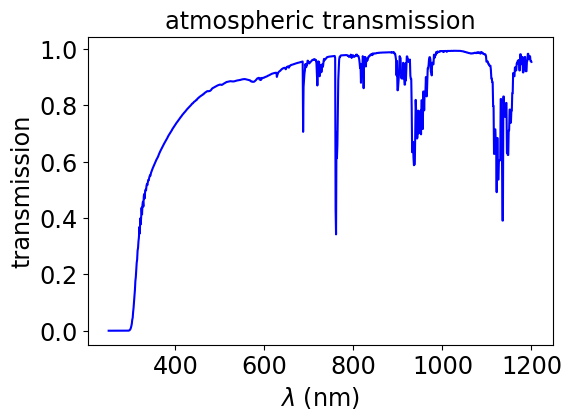

In [40]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
ax.plot(wlsim,atmsim,"b-")
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_title("atmospheric transmission")

In [41]:
f_atm = interpolate.interp1d(wlsim,atmsim,bounds_error=False,fill_value="extrapolate")

# Throughputs

## Auxtel throughput and  telescope throughput

In [42]:
array = np.loadtxt(filename_auxtelthroughput)
dft = pd.DataFrame(data=array,columns=["lambda","throughput"])

In [43]:
#dft = pd.read_excel(filename_auxtelthroughput,header=1,index_col=0)
dft.reset_index(inplace=True)
dft['index'] = dft.reset_index().index
dft.set_index('index')
dft.rename(columns={'lambda':'lambdas'},inplace = True)

Text(0.5, 1.0, 'auxtel throughput')

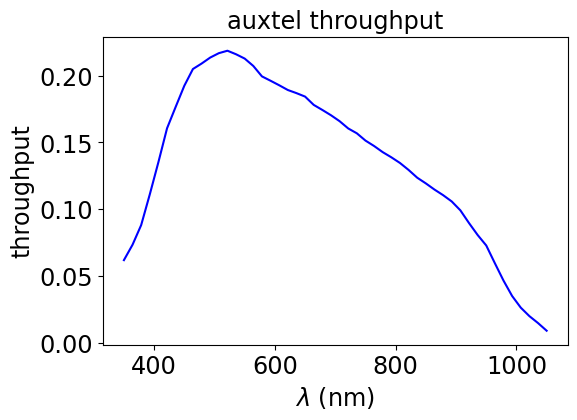

In [44]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
ax.plot(dft.lambdas,dft.throughput,"b-")
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("throughput")
ax.set_title("auxtel throughput")

In [45]:
# interpolation function
f_thr = interpolate.interp1d(dft.lambdas,dft.throughput,bounds_error=False,fill_value="extrapolate")

## spectrum data

In [46]:
fullfilename=os.path.join(inputdir,inputfile)

In [47]:
!ls data

absorption_pattern.csv
run-auxtel-holo-20230117-empty~holo4_003-PSF2DFFM_REBIN2.pickle
run-auxtel-holo-20230118-empty~holo4_003-PSF2DFFM_REBIN2.pickle
run-auxtel-holo-20230119-empty~holo4_003-PSF2DFFM_REBIN2.pickle


In [48]:
with open(fullfilename, 'rb') as f:
    summary_content = pickle.load(f)

In [49]:
NBSPECTRA=len(summary_content)

In [50]:
msg=f" Number of selected files is {NBSPECTRA}"
logger.info(msg)

2023-01-24 16:25:14,665 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO  Number of selected files is 48


In [51]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBSPECTRA)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBSPECTRA), alpha=1)

### Read all files

In [52]:
normalisationfactor

4.0

In [53]:
infos, all_spectra = GetSpectra(summary_content,factor = normalisationfactor)

In [54]:
N=len(infos)

In [55]:
NX=4
NY=N/NX

In [56]:
if NY != int(NY):
    NY= int(NY)+1
else:
    NY=int(NY)

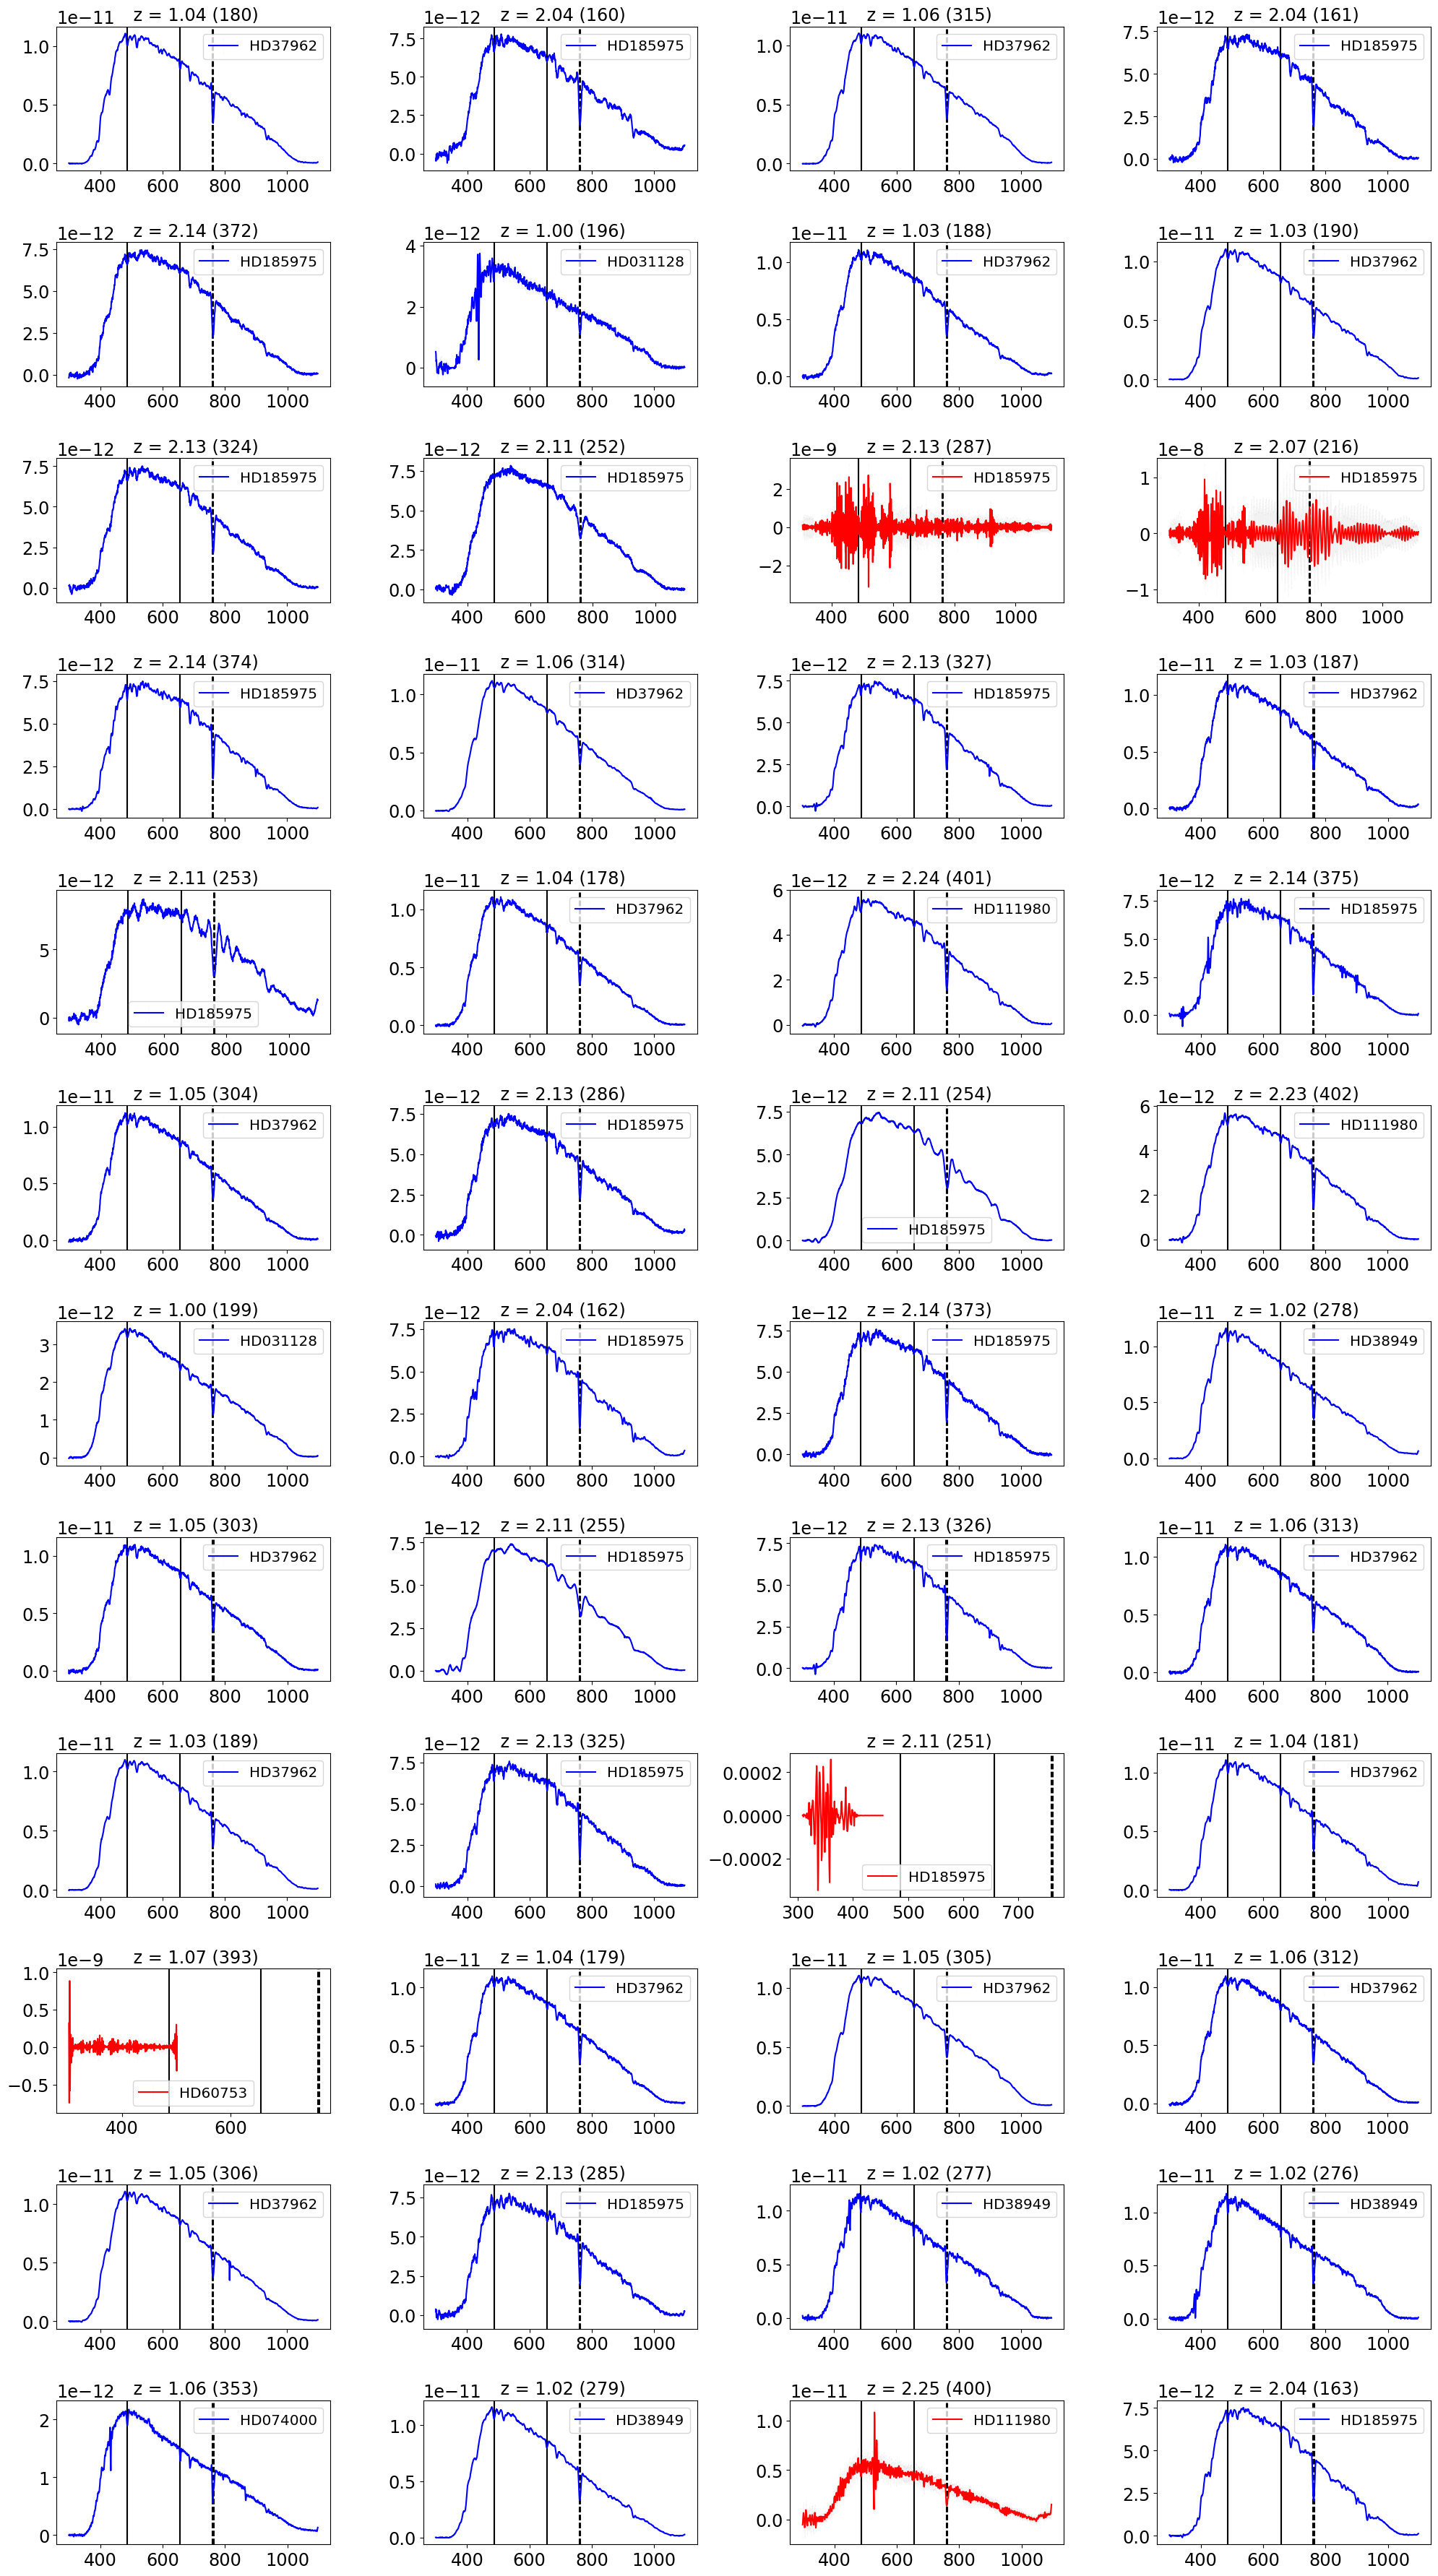

In [57]:
fig = plt.figure(figsize=(20,NY*3))

ny=0
nx=0

for idx in range(N):
    iy = idx//NX
    ix = (idx-iy*NX)
    
    ax=fig.add_subplot(NY,NX,idx+1)
    
    
    
    the_df=all_spectra[idx]
    
    airmassvalue = infos.iloc[idx]["airmass"]
    num = infos.iloc[idx]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    the_target = infos.iloc[idx]["object"]
    
    #ax.plot(the_df.wavelength,the_df.flux,color=all_colors[ifile])
    if num in list_of_badnums1:
        thecolor="r"
    else:
        thecolor="b"
    
    ax.errorbar(the_df["all_lambdas"],the_df['all_fluxes'],yerr=the_df["all_fluxes_err"], fmt = '-', color=thecolor,capsize = 0.01, ecolor="k", elinewidth = .01,label=the_target)
    ax.set_title(label_airmass)
    
    ax.axvline(HBETA.wavelength,linestyle="-",color="k")
    ax.axvline(HALPHA.wavelength,linestyle="-",color="k")
    
    # O2 line
    ax.axvline(O2_1.wavelength,linestyle="--",color="k")
    #ax.annotate(O2_1.label, xy=(O2_1.wavelength-5, FLUXLIMMAX/2), color='blue',fontsize=20,fontweight='bold')

    ax.axvline(O2_2.wavelength,linestyle="--",color="k")
    #ax.annotate(O2_2.label, xy=(O2_2.wavelength, ypos), color='blue',fontsize=20,fontweight='bold')
    
    ax.legend()
    
plt.tight_layout()

# Remove bad Spectra

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_27336/813861976.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')


[Text(0, 0, 'HD185975')]

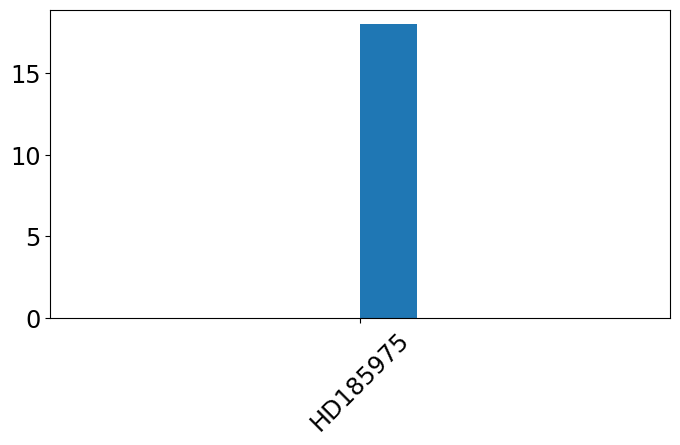

In [87]:
fig = plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,1,1)
ax.hist(infos.object);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')

Text(0.5, 0.98, 'Variables to apply selection')

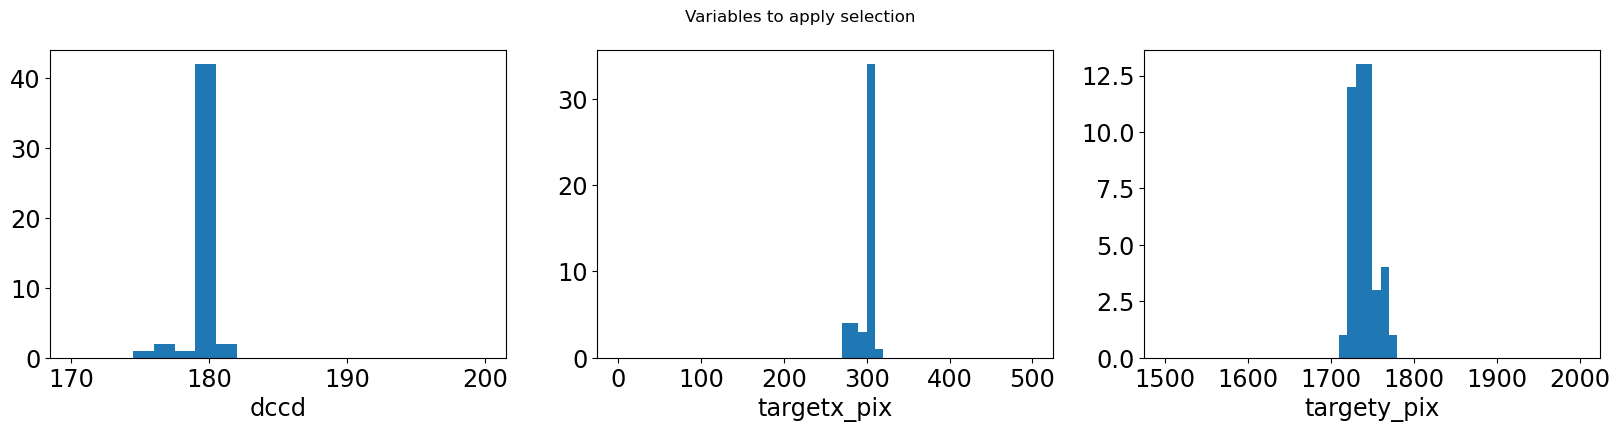

In [59]:
fig = plt.figure(figsize=(20,4))
ax=fig.add_subplot(1,3,1)
ax.hist(infos.d2ccd,bins=20,range=(170,200));
ax.set_xlabel("dccd")
ax=fig.add_subplot(1,3,2)
ax.hist(infos.targetx_pix,bins=50,range=(0,500));
ax.set_xlabel("targetx_pix")
ax=fig.add_subplot(1,3,3)
ax.hist(infos.targety_pix,bins=50,range=(1500,2000));
ax.set_xlabel("targety_pix")
plt.suptitle("Variables to apply selection")

## Define selection cut

In [60]:
selection_cut = ((infos.d2ccd > 178.5) & (infos.d2ccd < 181.5)) & (infos.object == target)
bad_cut = ~selection_cut

In [61]:
list_of_badnums2 = infos[bad_cut]["number"].values
list_of_badnums2 

array([180, 315, 196, 188, 190, 287, 216, 314, 187, 178, 401, 304, 402,
       199, 278, 303, 313, 189, 251, 181, 393, 179, 305, 312, 306, 277,
       276, 353, 279, 400])

# Union of badnums

In [62]:
list_of_badnums = np.union1d(list_of_badnums1,list_of_badnums2)
list_of_badnums=np.unique(list_of_badnums)

# Filtered spectra : remove bad spectra

In [63]:
list_of_badnums

array([178, 179, 180, 181, 187, 188, 189, 190, 196, 199, 216, 251, 276,
       277, 278, 279, 287, 303, 304, 305, 306, 312, 313, 314, 315, 353,
       393, 400, 401, 402])

In [64]:
infos, all_spectra = GetSpectraFiltered(summary_content,list_of_bad_spectra=list_of_badnums,factor = normalisationfactor)

Remove spectrum 0 for exposure 180
Remove spectrum 2 for exposure 315
Remove spectrum 5 for exposure 196
Remove spectrum 6 for exposure 188
Remove spectrum 7 for exposure 190
Remove spectrum 10 for exposure 287
Remove spectrum 11 for exposure 216
Remove spectrum 13 for exposure 314
Remove spectrum 15 for exposure 187
Remove spectrum 17 for exposure 178
Remove spectrum 18 for exposure 401
Remove spectrum 20 for exposure 304
Remove spectrum 23 for exposure 402
Remove spectrum 24 for exposure 199
Remove spectrum 27 for exposure 278
Remove spectrum 28 for exposure 303
Remove spectrum 31 for exposure 313
Remove spectrum 32 for exposure 189
Remove spectrum 34 for exposure 251
Remove spectrum 35 for exposure 181
Remove spectrum 36 for exposure 393
Remove spectrum 37 for exposure 179
Remove spectrum 38 for exposure 305
Remove spectrum 39 for exposure 312
Remove spectrum 40 for exposure 306
Remove spectrum 42 for exposure 277
Remove spectrum 43 for exposure 276
Remove spectrum 44 for exposure 3

In [65]:
print("Number of spectra : ",len(all_spectra))

Number of spectra :  18


In [66]:
infos.reset_index(drop=True, inplace=True)

In [67]:
infos

,number,object,dateobs,refhour,airmass,pressure,temperature,humidity,filename,targetx_pix,targety_pix,rotangle,d2ccd
0,160,HD185975,2023-01-20T00:59:50.040502810Z,-0.271672,2.042307,0,0,0,2023011900160,304.095012,1762.905018,0.436837,180.308913
1,161,HD185975,2023-01-20T01:00:06.250505502Z,-0.267169,2.042480,0,0,0,2023011900161,303.121791,1768.072331,0.481692,180.056240
2,372,HD185975,2023-01-20T04:42:32.532509100Z,3.440132,2.141163,0,0,0,2023011900372,318.308695,1757.271738,0.507797,180.223836
3,324,HD185975,2023-01-20T04:08:02.246501762Z,2.865052,2.134435,0,0,0,2023011900324,292.953339,1748.251339,0.490093,180.038122
4,252,HD185975,2023-01-20T02:54:54.846499893Z,1.646330,2.108738,0,0,0,2023011900252,289.750477,1748.091195,0.443308,181.043408
5,374,HD185975,2023-01-20T04:43:20.000490399Z,3.453317,2.141236,0,0,0,2023011900374,305.733211,1747.837153,0.485956,180.040861
6,327,HD185975,2023-01-20T04:09:30.581009943Z,2.889590,2.134733,0,0,0,2023011900327,302.969542,1751.363043,0.459116,180.229226
7,253,HD185975,2023-01-20T02:55:10.580497645Z,1.650701,2.108855,0,0,0,2023011900253,272.645642,1743.436794,0.759361,181.354182
8,375,HD185975,2023-01-20T04:44:02.814992676Z,3.465210,2.141326,0,0,0,2023011900375,302.329732,1749.734583,0.468457,180.152677
9,286,HD185975,2023-01-20T03:38:57.390992650Z,2.380370,2.125803,0,0,0,2023011900286,283.101735,1744.659672,0.506326,180.200920


/Users/dagoret/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


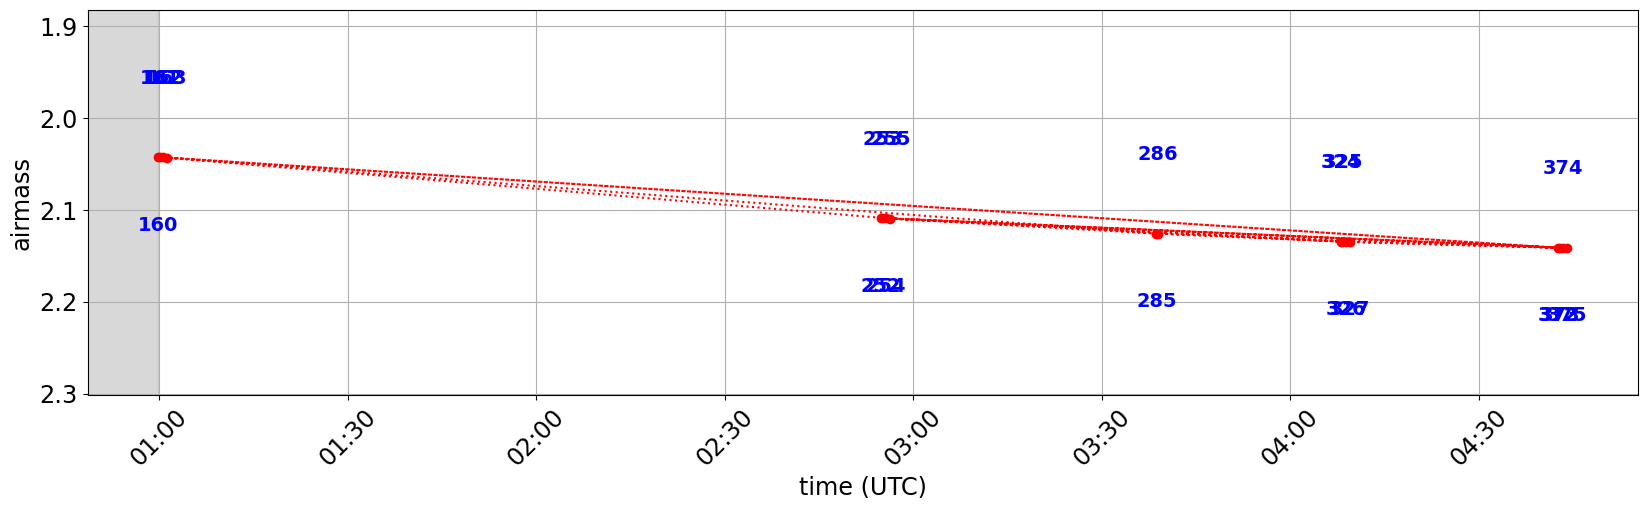

In [68]:
all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
numbers = infos['number'].values
airmasses = infos['airmass'].values
N= len(numbers)

myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)


# Create rectangle x coordinates
startTime = all_datetime[0]
endTime =  datetime(2022, 7, 1, 4, 0, 0, 0),

# convert to matplotlib date representation
start = mdates.date2num(startTime)
end = mdates.date2num(endTime)
width = end - start



fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
#ax.plot(all_datetime,grey_attenuation,'bo:')
#ax.grid()
#plt.gcf().autofmt_xdate()
#ax.xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_tick_params(rotation=45)
#ax.set_xlabel("time (UTC)")
#ax.set_title(f"Grey attenuation : {DATE} ({filterdisperser}, {target})")
#ax.set_ylabel("attenuation")
#ax2 = ax.twinx()

y_shift= 0.08

ax2=ax
ax2.plot(all_datetime,airmasses,'r:o')
ax2.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_tick_params(rotation=45)
ax2.set_xlabel("time (UTC)")
ax2.set_ylabel("airmass")
ax2.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
# Plot rectangle
rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
ax2.add_patch(rect)   
ax2.invert_yaxis()
ax2.grid()


for index in range(N):
    textstr= str(numbers[index])
    if index%2 == 0:
        dy = y_shift
    else:
        dy = -y_shift
            
    ax2.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    


# Plot Spectra

In [69]:
NBSPECTRA=len(all_spectra)

In [70]:
assert NBSPECTRA == len(infos)

In [71]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBSPECTRA)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBSPECTRA), alpha=1)

In [72]:
msg=f" Number of good spectra is {NBSPECTRA}"
logger.info(msg)

2023-01-24 16:25:33,622 mbp-dagoret2.ijclab.in2p3.fr __main__[27336] INFO  Number of good spectra is 18


### load absorption pattern

In [73]:
df = pd.read_csv("data/absorption_pattern.csv")
wlpt,o2,o3,h2o,no2 = atmpatt_Dataf_to_np(df)

In [74]:
def plotlines(ax,ypos):
    
    ax.axvline(HDELTA.wavelength,color='orange')
    ax.annotate(HDELTA.label, xy=(HDELTA.wavelength, ypos), color='orange',fontsize=20,fontweight='bold')
    
    ax.axvline(HGAMMA.wavelength,color='orange')
    ax.annotate(HGAMMA.label, xy=(HGAMMA.wavelength, ypos), color='orange',fontsize=20,fontweight='bold')
    
    ax.axvline(HBETA.wavelength,color='orange')
    ax.annotate(HBETA.label, xy=(HBETA.wavelength, ypos), color='orange',fontsize=20,fontweight='bold')
    
    ax.axvline(HALPHA.wavelength,color='orange')
    ax.annotate(HALPHA.label, xy=(HALPHA.wavelength, ypos), color='orange',fontsize=20,fontweight='bold')

    ax.axvline(O2B.wavelength,color="blue")
    ax.annotate(O2B.label, xy=(O2B.wavelength, ypos), color='blue',fontsize=20,fontweight='bold')

    ax.axvline(O2_1.wavelength,color="blue")
    #ax.annotate(O2_1.label, xy=(O2_1.wavelength-5, FLUXLIMMAX/2), color='blue',fontsize=20,fontweight='bold')

    ax.axvline(O2_2.wavelength,color="blue")
    ax.annotate(O2_2.label, xy=(O2_2.wavelength, ypos), color='blue',fontsize=20,fontweight='bold')

    ax.axvline(H2O_1.wavelength,color="blue")
    ax.annotate(H2O_1.label, xy=(H2O_1.wavelength, ypos), color='blue',fontsize=20,fontweight='bold')
    
    ax.axvline(H2O_2.wavelength,color="blue")
    ax.annotate(H2O_2.label, xy=(H2O_2.wavelength, ypos), color='blue',fontsize=20,fontweight='bold')
    

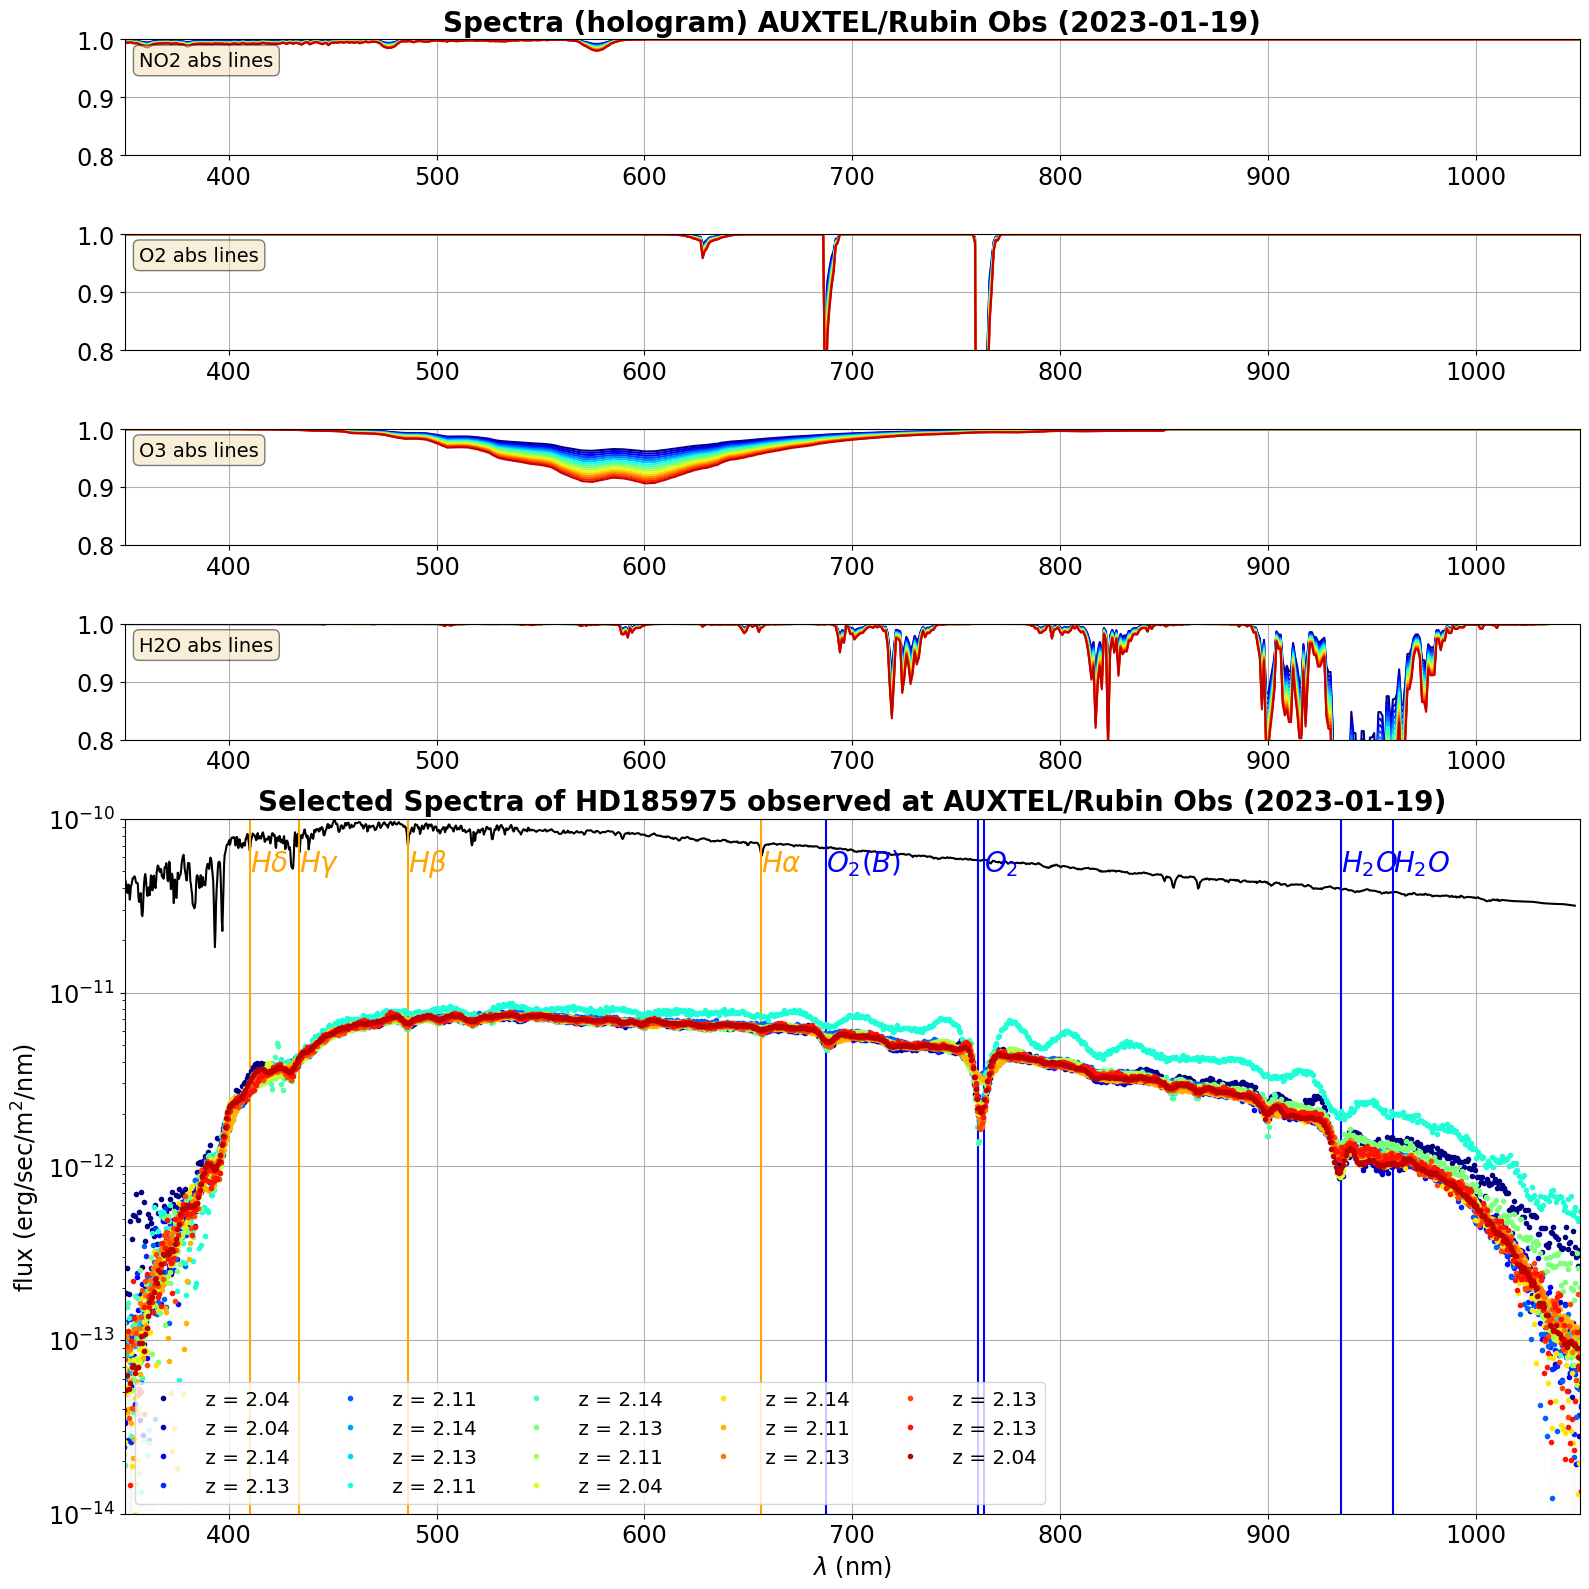

In [75]:
figsize=(16,16)

NOBS = o2.shape[1]
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NOBS), alpha=1)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=figsize)
title =f"Spectra (hologram) {SITE} ({DATE})"


gs = gridspec.GridSpec(5, 1,height_ratios=[0.5,0.5,0.5,0.5,3] ,figure=fig)

# NO2    
ax=fig.add_subplot(gs[0,0])
for index in np.arange(NOBS):   
    ax.plot(wlpt,no2[:,index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.grid()
textstr = "NO2 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_title(title,fontsize=20,fontweight='bold')
main_ax = ax



# O2    
ax=fig.add_subplot(gs[1,0], sharex=main_ax)
for index in np.arange(NOBS):   
    ax.plot(wlpt,o2[:,index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.grid()
textstr = "O2 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
#ax.set_title(title)


# Ozone
ax=fig.add_subplot(gs[2,0], sharex=main_ax)
for index in np.arange(NOBS):   
    ax.plot(wlpt,o3[:,index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.grid()
textstr = "O3 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# H2O
ax=fig.add_subplot(gs[3,0], sharex=main_ax)

for index in np.arange(NOBS):   
    ax.plot(wlpt,h2o[:,index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.grid()
textstr = "H2O abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# spectrum
ax=fig.add_subplot(gs[4,0], sharex=main_ax)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBSPECTRA)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBSPECTRA), alpha=1)
for ifile in np.arange(NBSPECTRA):
    the_df=all_spectra[ifile]
    
    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"

    #ax.plot(the_df.wavelength,the_df.flux,color=all_colors[ifile])
    ax.errorbar(the_df["all_lambdas"],the_df['all_fluxes'],yerr=the_df["all_fluxes_err"], fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("flux (erg/sec/m$^2$/nm)")
title=f"Selected Spectra of {target} observed at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_f,'k-')
#ax.set_xlim(350,1000)
#ax.set_ylim(1e-14,1e-10)
ax.set_ylim(FLUXLIMMIN,FLUXLIMMAX)
ax.set_yscale("log")
ax.legend(loc="lower left",ncol=5)

# draw abs lines
plotlines(ax,ypos=FLUXLIMMAX/2)




plt.tight_layout()


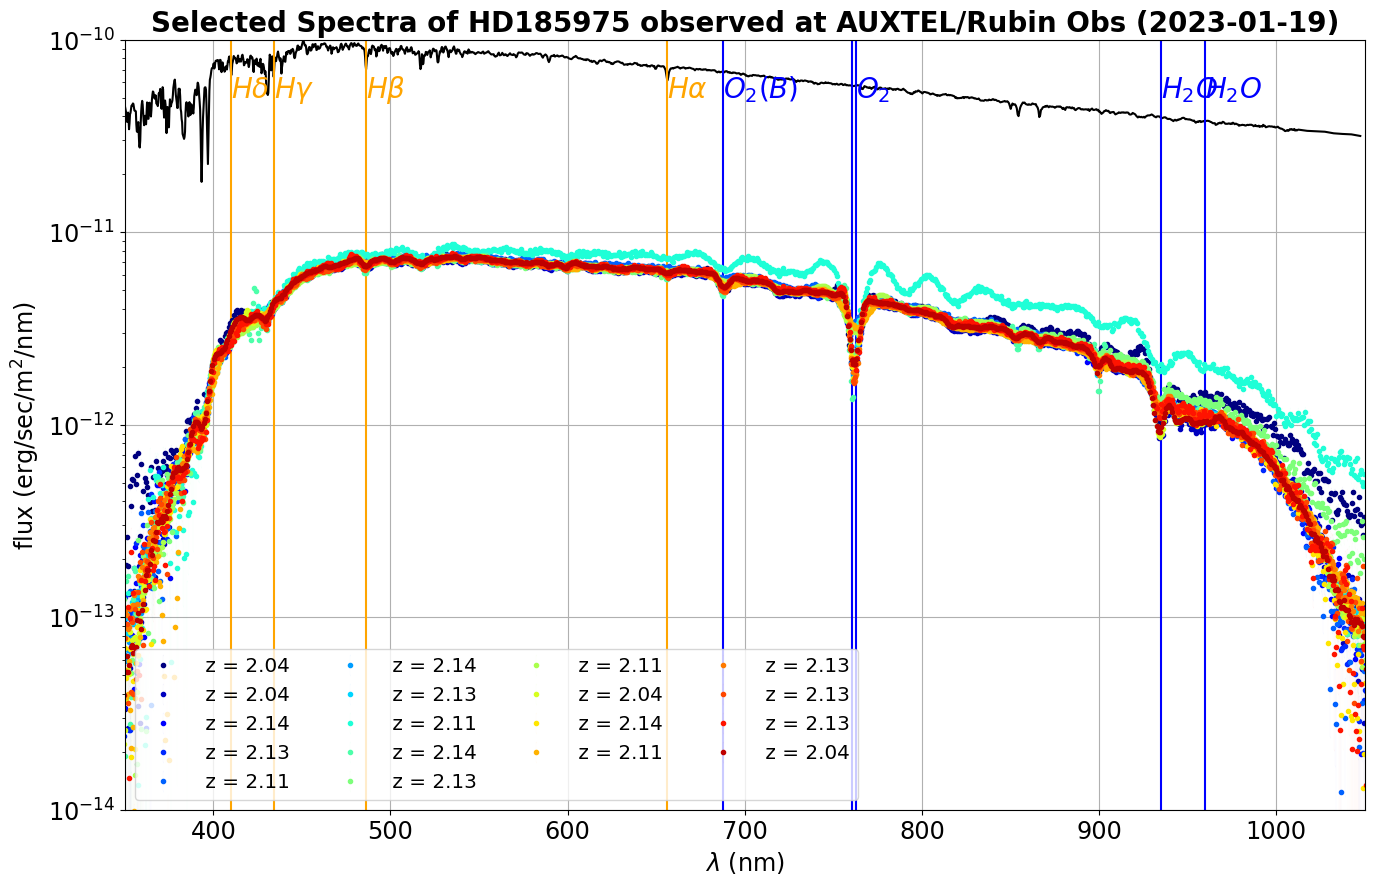

In [76]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
for ifile in np.arange(NBSPECTRA):
    the_df=all_spectra[ifile]
    
    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"

    #ax.plot(the_df.wavelength,the_df.flux,color=all_colors[ifile])
    ax.errorbar(the_df["all_lambdas"],the_df['all_fluxes'],yerr=the_df["all_fluxes_err"], fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("flux (erg/sec/m$^2$/nm)")
title=f"Selected Spectra of {target} observed at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_f,'k-')
ax.set_xlim( WLMINSEL  , WLMAXSEL  )
ax.set_ylim(FLUXLIMMIN,FLUXLIMMAX)
ax.set_yscale("log")
ax.legend(loc="lower left",ncol=4)
#ax.legend(bbox_to_anchor=(1.02, 0.5))

# draw abs lines
plotlines(ax,ypos=FLUXLIMMAX/2)


/Users/dagoret/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.04 (160)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.04 (161)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14 (372)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13 (324)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.11 (252)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14 (374)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13 (327)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.11 (253)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14 (375)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Excepti

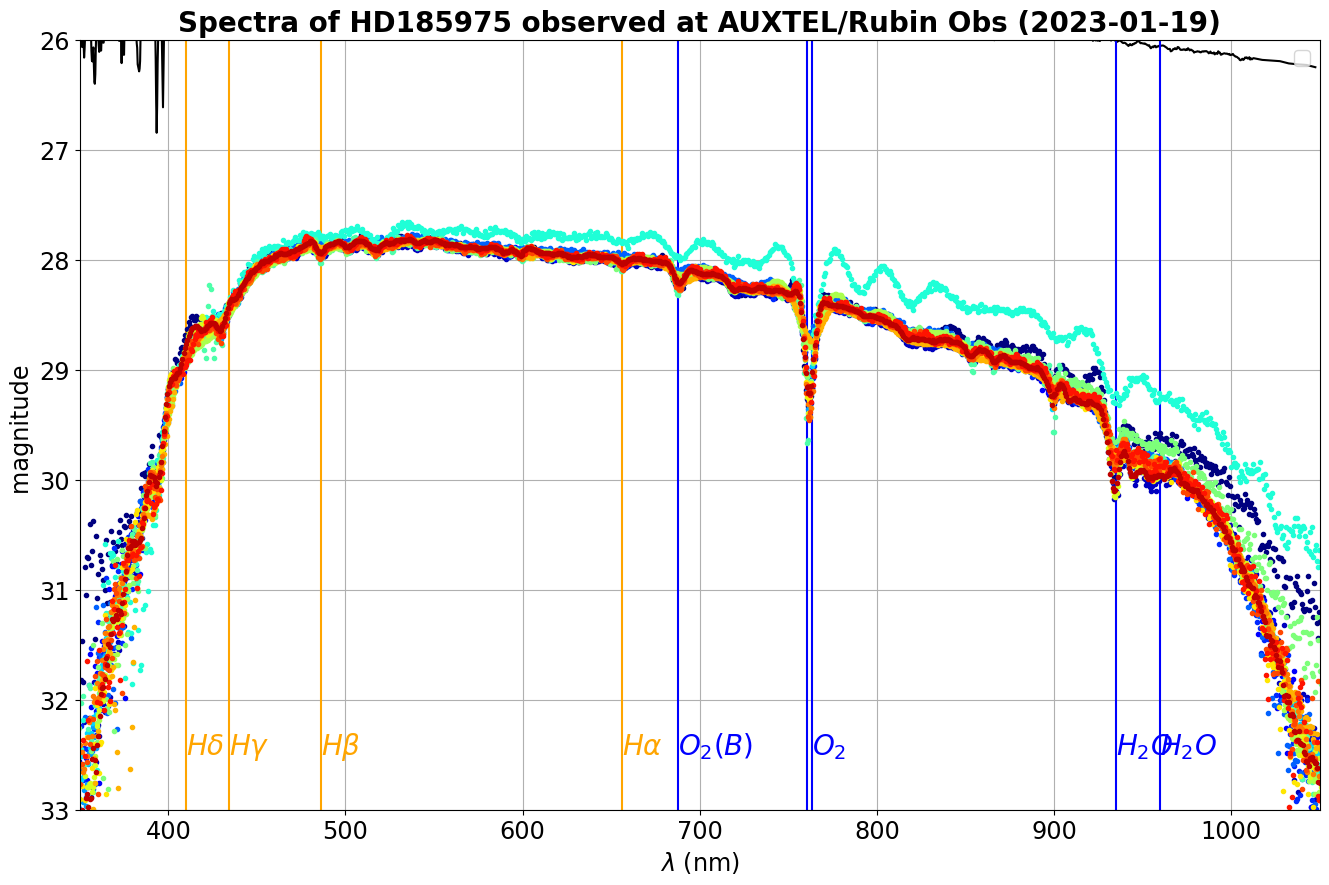

In [77]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
for ifile in np.arange(NBSPECTRA):
    the_df=the_df=all_spectra[ifile]

    airmassvalue = infos.iloc[ifile]["airmass"]
    num = infos.iloc[ifile]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    
    #ax.plot(the_df.wavelength,the_df.mag,color=all_colors[ifile])
    mag = -2.5*np.log10(the_df["all_fluxes"])
    errmag = 2.5/np.log(10)*the_df["all_fluxes_err"]/(the_df["all_fluxes"])
    try:
        ax.errorbar(the_df["all_lambdas"],mag,yerr=errmag, fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
    except Exception as inst:
        print(type(inst))    # the exception instance
        print(inst.args)
        print(f"Exception ocurred at {label_airmass}")
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("magnitude ")
title=f"Spectra of {target} observed at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_m,'k-')
ax.set_xlim( WLMINSEL  , WLMAXSEL  )
ax.set_ylim(MAGLIMMIN,MAGLIMMAX)
ax.invert_yaxis()
ax.legend(loc="upper right",ncol=4)
#ax.legend(bbox_to_anchor=(1.02, 0))

# draw abs lines
plotlines(ax,ypos=MAGLIMMAX-0.5)


<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.04 (160)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.04 (161)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14 (372)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13 (324)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.11 (252)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14 (374)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13 (327)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.11 (253)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14 (375)
<class 'ValueError'>
("'yerr' must not contain negative values",)
Excepti

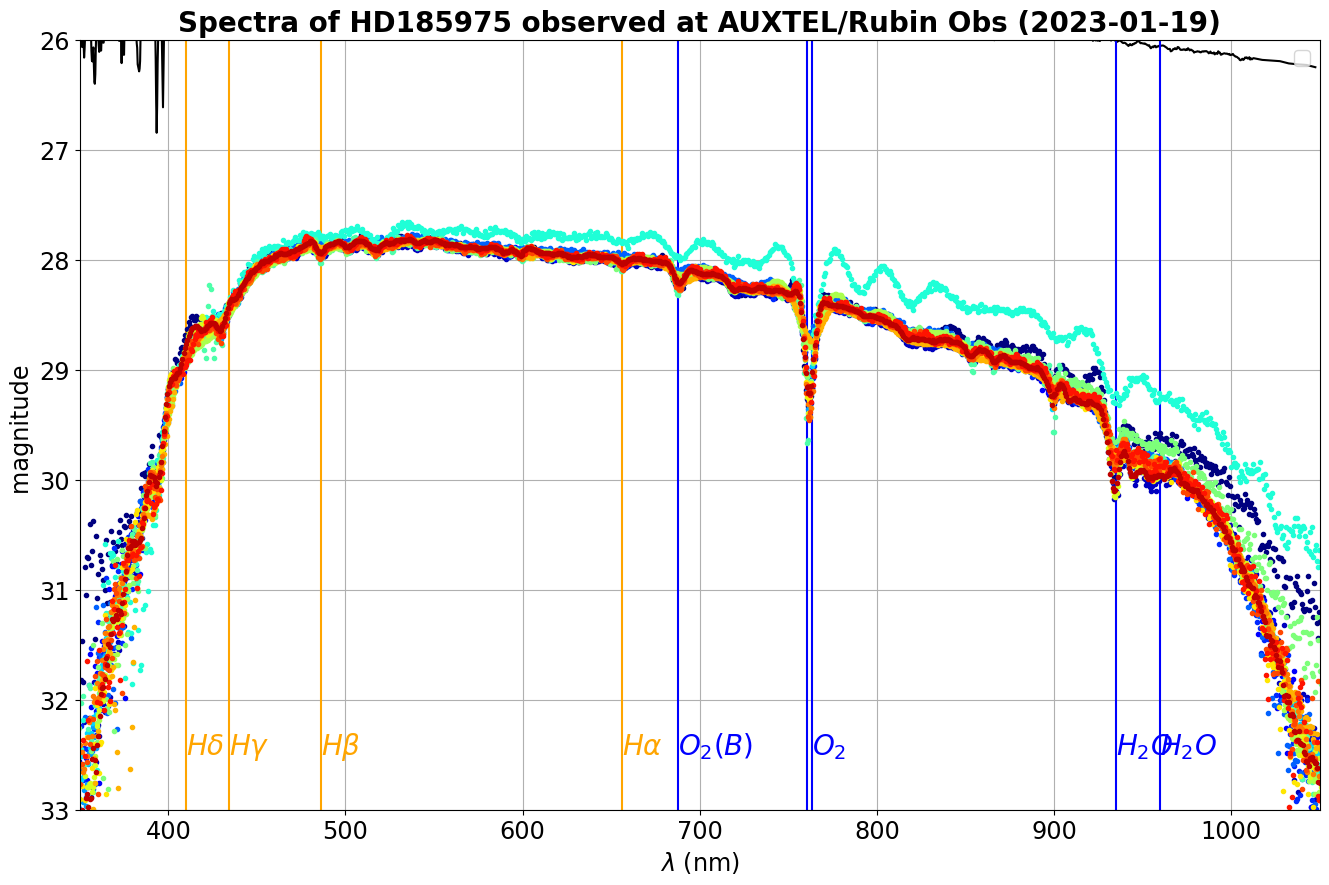

In [78]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
for ifile in np.arange(NBSPECTRA):
    the_df=the_df=all_spectra[ifile]

    airmassvalue = infos.iloc[ifile]["airmass"]
    num = infos.iloc[ifile]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    
    #ax.plot(the_df.wavelength,the_df.mag,color=all_colors[ifile])
    mag = -2.5*np.log10(the_df["all_fluxes"])
    errmag = 2.5/np.log(10)*the_df["all_fluxes_err"]/(the_df["all_fluxes"])
    try:
        ax.errorbar(the_df["all_lambdas"],mag,yerr=errmag, fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
    except Exception as inst:
        print(type(inst))    # the exception instance
        print(inst.args)
        print(f"Exception ocurred at {label_airmass}")
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("magnitude ")
title=f"Spectra of {target} observed at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_m,'k-')
ax.set_xlim( WLMINSEL  , WLMAXSEL  )
ax.set_ylim(MAGLIMMIN,MAGLIMMAX)
ax.invert_yaxis()
ax.legend(loc="upper right",ncol=5)
#ax.legend(bbox_to_anchor=(1.02, 0))
# draw abs lines
plotlines(ax,ypos=MAGLIMMAX-0.5)

# Multiply SED by all throughput

In [79]:
correction_area = 1.06/1.13

In [80]:
sed_predicted_f = f_sed(WL) * f_thr(WL) * f_atm(WL) 
sed_predicted_m = -2.5*np.log10(sed_predicted_f) 

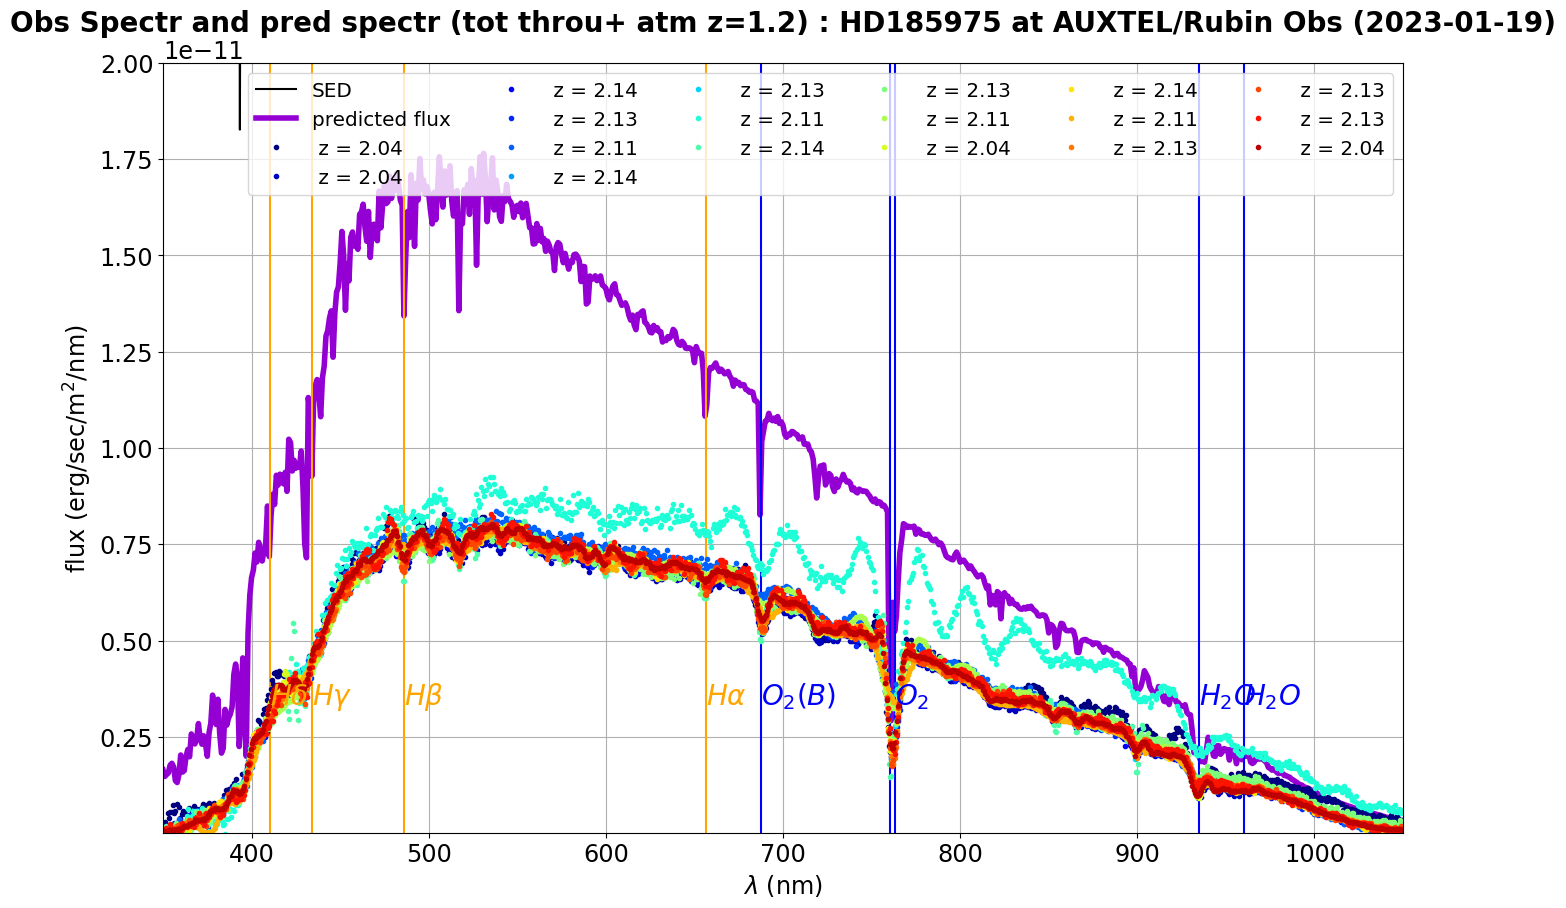

In [81]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
for ifile in np.arange(NBSPECTRA):
    the_df=all_spectra[ifile]
    
    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"

    #ax.plot(the_df.wavelength,the_df.flux,color=all_colors[ifile])
    ax.errorbar(the_df["all_lambdas"],the_df['all_fluxes']/correction_area,yerr=the_df["all_fluxes_err"], fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("flux (erg/sec/m$^2$/nm)")
title=f"Obs Spectr and pred spectr (tot throu+ atm z=1.2) : {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_f,'k-',label="SED")
ax.plot(WL,sed_predicted_f,color='darkviolet',lw=4,label = "predicted flux")
ax.set_xlim( WLMINSEL  , WLMAXSEL  )
ax.set_ylim(FLUXLIMMIN,FLUXLIMMAX/5.)
#ax.set_yscale("log")
ax.legend(loc="upper right",ncol=6)


# draw abs lines
plotlines(ax,ypos=FLUXLIMMAX/30)



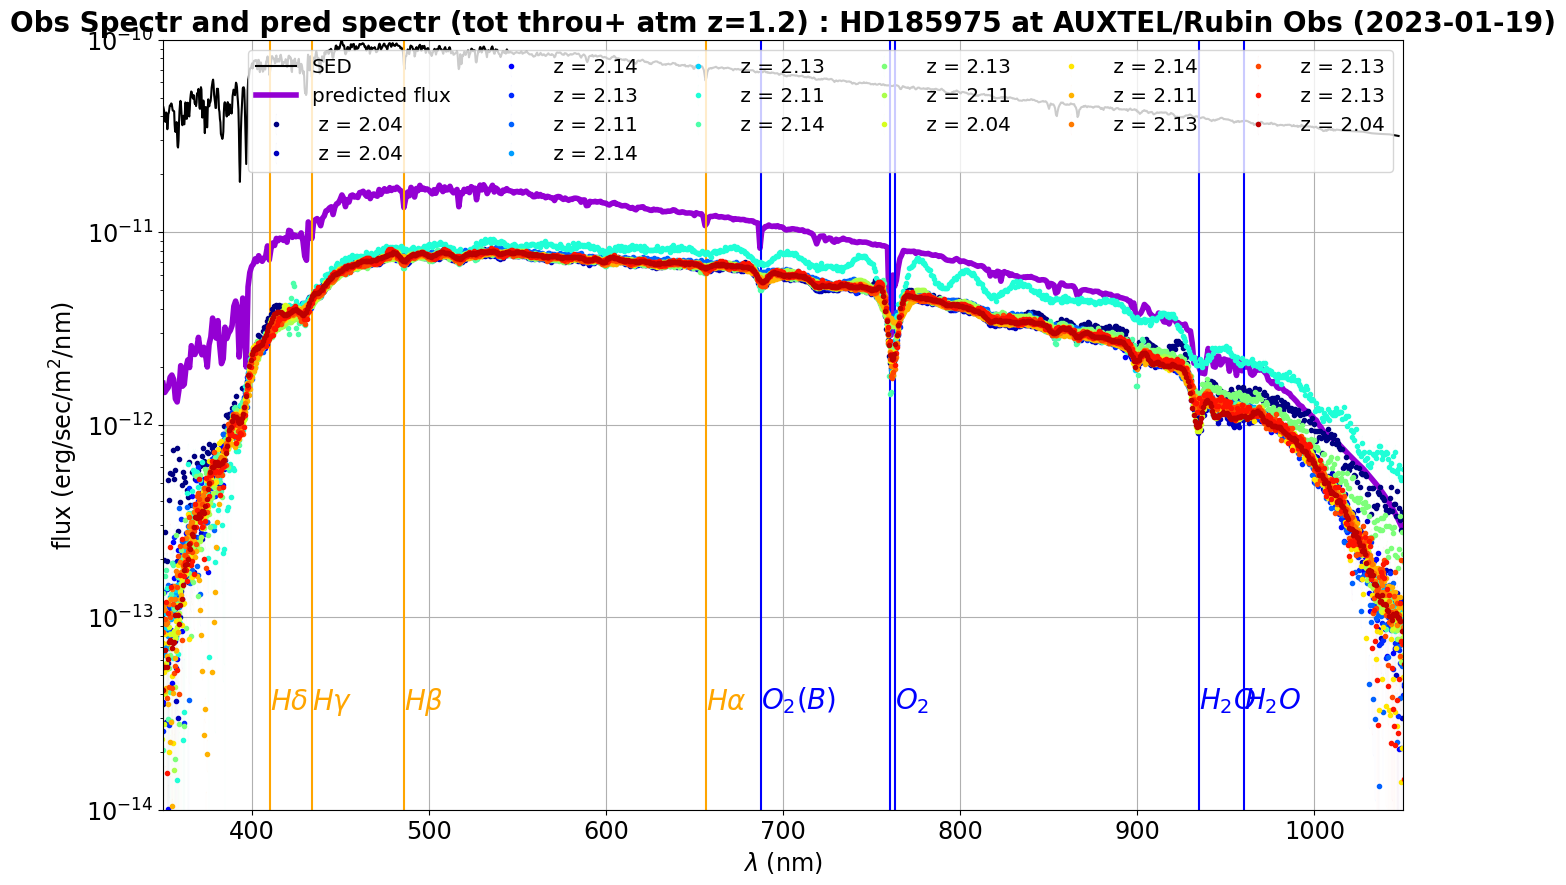

In [82]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
for ifile in np.arange(NBSPECTRA):
    the_df=all_spectra[ifile]
    
    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"

    #ax.plot(the_df.wavelength,the_df.flux,color=all_colors[ifile])
    ax.errorbar(the_df["all_lambdas"],the_df['all_fluxes']/correction_area,yerr=the_df["all_fluxes_err"], fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("flux (erg/sec/m$^2$/nm)")
title=f"Obs Spectr and pred spectr (tot throu+ atm z=1.2) : {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_f,'k-',label="SED")
ax.plot(WL,sed_predicted_f,color='darkviolet',lw=4,label = "predicted flux")
ax.set_xlim( WLMINSEL  , WLMAXSEL  )
ax.set_ylim(FLUXLIMMIN,FLUXLIMMAX)
ax.set_yscale("log")
ax.legend(loc="upper right",ncol=6)

# draw abs lines
plotlines(ax,ypos=FLUXLIMMAX/3000)

<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.04
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.04
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.11
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.11
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.14
<class 'ValueError'>
("'yerr' must not contain negative values",)
Exception ocurred at  z = 2.13
<class 'ValueError'>
("'yerr' 

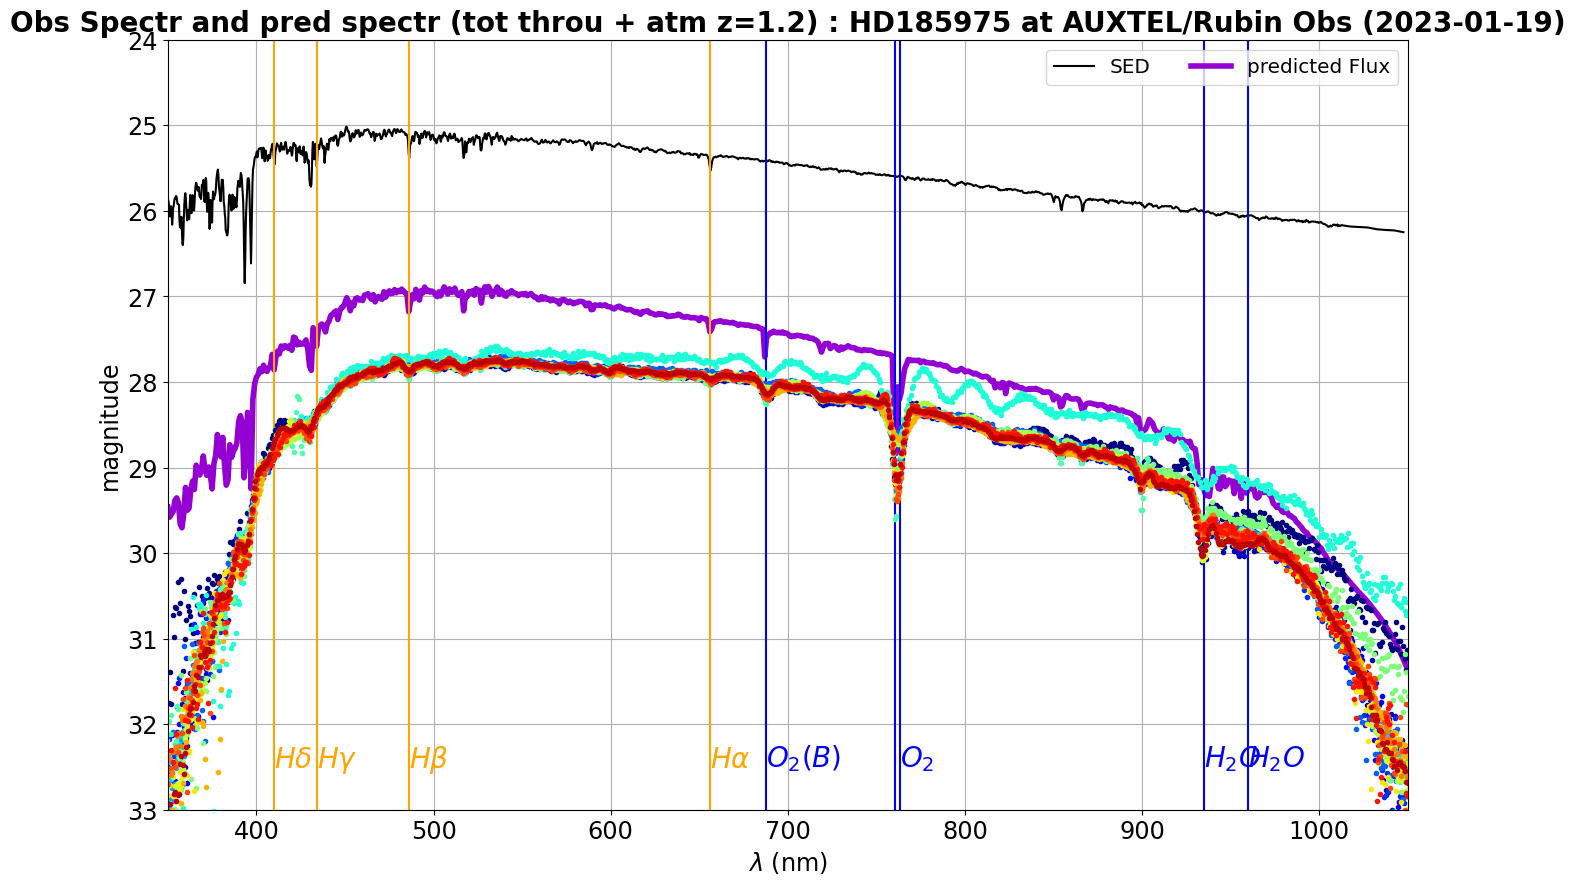

In [83]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
for ifile in np.arange(NBSPECTRA):
    the_df=the_df=all_spectra[ifile]

    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"
    
    #ax.plot(the_df.wavelength,the_df.mag,color=all_colors[ifile])
    mag = -2.5*np.log10(the_df["all_fluxes"]/correction_area)
    errmag = 2.5/np.log(10)*the_df["all_fluxes_err"]/(the_df["all_fluxes"])
    try:
        ax.errorbar(the_df["all_lambdas"],mag,yerr=errmag, fmt = '.', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
    except Exception as inst:
        print(type(inst))    # the exception instance
        print(inst.args)
        print(f"Exception ocurred at {label_airmass}")
    
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("magnitude")
title=f"Obs Spectr and pred spectr (tot throu + atm z=1.2) : {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_m,'k-',label = 'SED')
ax.plot(WL,sed_predicted_m,color='darkviolet',lw=4,label = "predicted Flux")

ax.set_ylim(MAGLIMMIN-2.,MAGLIMMAX)
ax.set_xlim( WLMINSEL  , WLMAXSEL  )

ax.invert_yaxis()

ax.legend(loc="upper right",ncol=5)

# draw abs lines
plotlines(ax,ypos=MAGLIMMAX-0.5)

In [84]:
assert False

AssertionError: 

# Filtering a line

In [ ]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("flux (erg/sec/m$^2$/nm)")
title=f"Pred spectr (tot throu+ atm z=1.2) : {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
ax.plot(sed_w,sed_f,'k-',label="SED")
ax.plot(WL,sed_predicted_f,color='darkviolet',lw=4,label = "predicted flux")
ax.set_xlim( WLMINSEL  , WLMAXSEL  )
ax.set_ylim(FLUXLIMMIN,FLUXLIMMAX)

# filtered flux
span = 3
sed_predicted_f_filtered = smooth_data_np_convolve(sed_predicted_f, span)
ax.plot(WL,sed_predicted_f_filtered/2,"-.",color='darkviolet',lw=4,label = "predicted flux filtered/2")


ax.set_yscale("log")
ax.legend(loc="upper right")


# draw abs lines
plotlines(ax,ypos=FLUXLIMMAX/2000)

# Ratio

In [ ]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

# input spectra
all_spectra_interp = []

for ifile in np.arange(NBSPECTRA):
    the_df=the_df=all_spectra[ifile]

    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"
    num = infos.iloc[ifile]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    
    
    x=the_df["all_lambdas"]
    y=the_df['all_fluxes']/correction_area, 
    yerr=the_df["all_fluxes_err"]
    
    
    f = interpolate.interp1d(x, y,bounds_error=False,fill_value=0)
    fe = interpolate.interp1d(x, yerr,bounds_error=False,fill_value=0)
    y_interp =f(WL)[0]
    ey_interp = fe(WL)[0]
    
    
    
    ratio = y_interp/sed_predicted_f_filtered
    eratio = ey_interp/sed_predicted_f_filtered
    
    all_spectra_interp.append(y_interp)

    

    #if num == 87 or num == 330 or num == 331:
    ax.errorbar(WL,ratio,yerr=eratio, fmt = '-', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)

ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
title=f"Ratio Obs Spectr and pred spectr (tot throu + atm z=1.2) : {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
#ax.plot(sed_w,sed_m,'k-',label = 'SED')
#ax.plot(WL,sed_predicted_m,color='darkviolet',lw=4,label = "predicted Flux")

#ax.set_ylim(MAGLIMMIN,MAGLIMMAX)
ax.set_xlim( WLMINSEL  , WLMAXSEL  )

#ax.invert_yaxis()
ax.set_ylim(0.3,1.4)
ax.legend(loc="upper right",ncol=5)

# Make Simulation with true airmass & pressure

In [ ]:
infos

## Define PWV

In [ ]:
all_pwv = np.array([0., 4., 8. ])
NPWV = len(all_pwv)

### Header

- 0 : index of simulation
- 1 : index of spectra
- 2 : spectrum number
- 3 : airmass value
- 4 : pressure
- 5 : pwv
- 6 : aer
- 7 : ozone
- 8 : cloud extinction
- 9 : humidity
- 10 : start of sim

In [ ]:
ATM_VERSION = "v01"
IDX_SIM_IDX = 0
IDX_SPEC_IDX = 1
IDX_SPEC_NUM = 2
IDX_SPEC_AM = 3
IDX_WEATH_PRES = 4
IDX_WEATH_PWV = 5
IDX_WEATH_AER = 6
IDX_WEATH_OZON = 7
IDX_WEATH_CLD = 8
IDX_WEATH_HUM = 9
IDX_SIM_START = 10

In [ ]:
atmosphere_type="us"

In [ ]:
#atmsimfilename = f"atmsim-{DATE}-{filterdisperser}-{atmosphere_type}-{ATM_VERSION}.npy"
atmsimfilename = f"atmsim-{DATE}-{filterdisperser}-{atmosphere_type}-{target}-{ATM_VERSION}-{spectractormode}.npy"
atmsimfilename 

In [ ]:
FLAG_ATMSIMFILE = False
if os.path.isfile(atmsimfilename):
    FLAG_ATMSIMFILE = True    

In [ ]:
if not FLAG_ATMSIMFILE:
    atmsim = np.zeros((NBSPECTRA*NPWV+1,IDX_SIM_START + NBINSIM))
    atmsim[0, IDX_SIM_START:] = wlsim
    
    
    # loop on spectra

    idx_sim = 0

    for idx_spec in range(NBSPECTRA):
    
        print(f"atmospheric simulation for spectrum index : {idx_spec}")
    
        num = infos.iloc[idx_spec]["number"]
        # loop on pwv
        for pwv in all_pwv:
            am       = infos.iloc[idx_spec]["airmass"]
            pressure = infos.iloc[idx_spec]["pressure"]
            hum      = infos.iloc[idx_spec]["humidity"]
            aer      = 0
            ozone    = 300.
            cloudext = 0
    
    
            path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,prof_str='us',proc_str='sa',cloudext=cloudext)
            data = np.loadtxt(os.path.join(path,thefile))
            wlsim = data[:,0]
            tratmsim = data[:,1]
        
        
            # counter on simulation from 1 to NBSPECTRA*NPWV
            idx_sim += 1
        
            ## fill array
            atmsim[idx_sim,IDX_SIM_IDX]    = idx_sim
            atmsim[idx_sim,IDX_SPEC_IDX]   = idx_spec
            atmsim[idx_sim,IDX_SPEC_NUM]   = num 
            atmsim[idx_sim,IDX_SPEC_AM]    = am
            atmsim[idx_sim,IDX_WEATH_PRES] = pressure
            atmsim[idx_sim,IDX_WEATH_PWV]  = pwv
            atmsim[idx_sim,IDX_WEATH_AER]  = aer
            atmsim[idx_sim,IDX_WEATH_OZON] = ozone
            atmsim[idx_sim,IDX_WEATH_CLD]  = cloudext
            atmsim[idx_sim,IDX_WEATH_HUM]  = hum
            atmsim[idx_sim,IDX_SIM_START:] = tratmsim
            
else:
    print(f"Load file {atmsimfilename}")
    atmsim = np.load(atmsimfilename)
    print(atmsim.shape)
        
        
    

In [ ]:
if not FLAG_ATMSIMFILE:
    np.save(atmsimfilename,atmsim)
    FLAG_ATMSIMFILE = True

In [ ]:
plt.imshow(atmsim[1:,IDX_SIM_START:],origin="lower", aspect='auto', extent = [ atmsim[0,IDX_SIM_START],atmsim[0,-1],0,NBSPECTRA*NPWV ])

# Compute ratio

In [ ]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

all_ratio = []
all_num = []
all_label = []
all_airmass = []
all_date = []

all_spectra_sim_interp = []

for ifile in np.arange(NBSPECTRA):
    the_df=the_df=all_spectra[ifile]

    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"
    num = infos.iloc[ifile]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    all_date = infos.iloc[ifile]["dateobs"]
    
    all_num.append(num)
    all_label.append(label_airmass)
    all_airmass.append(airmassvalue)
    
    # data
    x=the_df["all_lambdas"]
    y=the_df['all_fluxes']/correction_area
    yerr=the_df["all_fluxes_err"]/correction_area
    
    
    f = interpolate.interp1d(x, y,bounds_error=False,fill_value=0)
    fe = interpolate.interp1d(x, yerr,bounds_error=False,fill_value=0)
    y_interp =f(WL)
    ey_interp = fe(WL)
    
    # atmsim
    x0 = atmsim[0, IDX_SIM_START:]
    y0 = atmsim[ifile*NPWV+1 + 1  ,IDX_SIM_START:]
    f0_atm = interpolate.interp1d(x0,y0,bounds_error=False,fill_value="extrapolate")
    flux_predicted_f = f_sed(WL) * f_thr(WL) * f0_atm(WL) 
    span = 3
    flux_predicted_f_filtered = smooth_data_np_convolve(flux_predicted_f, span)
    
    all_spectra_sim_interp.append(flux_predicted_f_filtered ) 
    
    ratio = y_interp/flux_predicted_f_filtered
    eratio = ey_interp/flux_predicted_f_filtered
    

    #if num == 87 or num == 330 or num == 331:
    ax.errorbar(WL,ratio,yerr=eratio, fmt = '-', color=all_colors[ifile],capsize = 0.01, ecolor=all_colors[ifile], elinewidth = .01,label=label_airmass)
    all_ratio.append(ratio)
        
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
title=f"Ratio Obs Spectr and pred spectr at airmass: {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
#ax.plot(sed_w,sed_m,'k-',label = 'SED')
#ax.plot(WL,sed_predicted_m,color='darkviolet',lw=4,label = "predicted Flux")

#ax.set_ylim(MAGLIMMIN,MAGLIMMAX)
ax.set_xlim( WLMINSEL  , WLMAXSEL  )

#ax.invert_yaxis()
ax.set_ylim(0.3,1.4)
ax.legend(loc="upper right",ncol=5)

plotlines(ax,ypos=0.35)

# Find the upper curve for the ratio and calculate ratio of ratio to get grey attenuation

In [ ]:
indexes=np.where(np.logical_and(WL> 500,WL<650))[0]          

In [ ]:
average_ratio = np.array([ np.mean(ratio[indexes]) for ratio in  all_ratio])

### find top spectrum

In [ ]:
idx_max = np.where(average_ratio == average_ratio.max())[0][0]
ratio_max= all_ratio[idx_max]
label_ratio_max = all_label[idx_max]
spec_max  = all_spectra_interp[idx_max]

### Lowest spectrum

In [ ]:
idx_min = np.where(average_ratio == average_ratio.min())[0][0]
ratio_min= all_ratio[idx_min]
label_ratio_min = all_label[idx_min]
label_ratio_min
spec_min  = all_spectra_interp[idx_min]

In [ ]:
all_airmass=np.array(all_airmass)
idx_zmin = np.where(all_airmass==all_airmass.min())[0][0]
ratio_zmin= all_ratio[idx_zmin]
label_ratio_zmin = all_label[idx_zmin]
spec_zmin = all_spectra_interp[idx_zmin]

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.plot(WL,ratio_max,'b-',label=label_ratio_max)
ax.plot(WL,ratio_min,'g-',label=label_ratio_min)
ax.plot(WL,all_ratio[idx_zmin],'k-',label=label_ratio_zmin)
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
ax.set_xlim( WLMINSEL  , WLMAXSEL  )

#ax.invert_yaxis()
ax.set_ylim(0.3,1.4)
ax.legend(loc="upper right",ncol=2)

# Work with Pairs

## Pairs at simular airmass

In [ ]:
dfpair = FindPairOfExposures(infos)
dfpair

In [ ]:
rank=0
idx1_pair = int(dfpair.iloc[rank]["idx1"])
idx2_pair = int(dfpair.iloc[rank]["idx2"])
spec_pair_1  = all_spectra_interp[idx1_pair]/average_ratio[idx1_pair]
spec_pair_2  = all_spectra_interp[idx2_pair]/average_ratio[idx2_pair]

specsim_pair_1 = all_spectra_sim_interp[idx1_pair]
specsim_pair_2 = all_spectra_sim_interp[idx2_pair]

z1 = dfpair.iloc[rank]["z1"]
z2 = dfpair.iloc[rank]["z2"]
dt = dfpair.iloc[rank]["dtime"]
num1 = int(dfpair.iloc[rank]["num1"])
num2 = int(dfpair.iloc[rank]["num2"])

In [ ]:
span=15
#ratio_spectra=spec_pair_2/spec_pair_1
#ratio_spectrasim=specsim_pair_2/specsim_pair_1
#ratio_spectra_smoo = smooth_data_np_convolve(ratio_spectra, span)
#ratio_spectrasim_smoo = smooth_data_np_convolve(ratio_spectrasim, span)

ratio_spectra_smoo = smooth_data_np_convolve(spec_pair_2, span)/smooth_data_np_convolve(spec_pair_1, span)
ratio_spectrasim_smoo = smooth_data_np_convolve(specsim_pair_2, span)/smooth_data_np_convolve(specsim_pair_1, span)

ax = None
fig=plt.figure(figsize=(10,6))
#plt.plot(WL,ratio_spectra,color="grey",alpha=0)

plt.plot(WL,ratio_spectra_smoo,"r-",lw=3,label="smoothed spectr data") 
plt.plot(WL,ratio_spectrasim_smoo,"b-",lw=3,label="smoothed spec sim") 
plt.grid()
plt.legend(loc="lower center")
plt.ylim(0.8,1.2)
#plt.xlim(WLMINSEL+span,WLMAXSEL-span)
plt.xlim(380,700)
#title = f"z1={z1:.2f}, z2={z2:.2f}, dt={dt:.1f}"
title=f"Ratio Obs Spectr different airmasses: {target} at {SITE} ({DATE})"

plt.title(title)

textstr = '\n'.join((
    r'$z_1=%.2f$ - (#%.d)' % (z1,num1 ),
    r'$z_2=%.2f$ - (#%.d)' % (z2,num2 ),
    r'$\Delta t=%.2f$ hours' % (dt, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
if not ax:
    ax = plt.gca()
ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plotlines(ax,ypos=0.9)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
plt.show()

In [ ]:
all_smoothed_ratios_data = []
all_smoothed_ratios_sim = []
all_dt = []
all_labels=[]

NF = len(dfpair)
NC=4
NR=int(np.ceil(NF/NC))
fig=plt.figure(figsize=(NC*10,6*NR))


for irank in range(len(dfpair)):
    
    ax=fig.add_subplot(NR,NC,irank+1)
    
    idx1_pair = int(dfpair.iloc[irank]["idx1"])
    idx2_pair = int(dfpair.iloc[irank]["idx2"])
    spec_pair_1  = all_spectra_interp[idx1_pair]/average_ratio[idx1_pair]
    spec_pair_2  = all_spectra_interp[idx2_pair]/average_ratio[idx2_pair]
    specsim_pair_1 = all_spectra_sim_interp[idx1_pair]
    specsim_pair_2 = all_spectra_sim_interp[idx2_pair]
    z1 = dfpair.iloc[irank]["z1"]
    z2 = dfpair.iloc[irank]["z2"]
    dt = dfpair.iloc[irank]["dtime"]
    num1 = int(dfpair.iloc[irank]["num1"])
    num2 = int(dfpair.iloc[irank]["num2"])
    
    span=15
    #ratio_spectra=spec_pair_2/spec_pair_1
    #ratio_spectrasim=specsim_pair_2/specsim_pair_1
    #ratio_spectra_smoo = smooth_data_np_convolve(ratio_spectra, span)
    #ratio_spectrasim_smoo = smooth_data_np_convolve(ratio_spectrasim, span)
    
    ratio_spectra_smoo = smooth_data_np_convolve(spec_pair_2, span)/smooth_data_np_convolve(spec_pair_1, span)
    ratio_spectrasim_smoo = smooth_data_np_convolve(specsim_pair_2, span)/smooth_data_np_convolve(specsim_pair_1, span)
    
    all_smoothed_ratios_data.append(ratio_spectra_smoo)
    all_smoothed_ratios_sim.append(ratio_spectrasim_smoo)
    all_dt.append(dt) 
    
    
    #ax.plot(WL,ratio_spectra,color="grey",alpha=0)
    ax.plot(WL,ratio_spectra_smoo,"r-",lw=3,label="smoothed spectr-ratio data : spec2/spec1") 
    ax.plot(WL,ratio_spectrasim_smoo,"b-",lw=3,label="smoothed spectr-ratio sim (no aerosol)") 
    ax.grid()
    ax.legend(loc='lower center')
    
    ymin=0.9
    ymax=1.1
    yscale=ymax-ymin
    
    
    ax.set_ylim(ymin,ymax)
    #ax.set_xlim(WLMINSEL+span,WLMAXSEL-span)
    ax.set_xlim(380,700)
    title = f"z1={z1:.2f}, z2={z2:.2f}, dt={dt:.1f}"
    title = f"pair {irank+1}"
    
    textstr = '\n'.join((
    r'$z_1=%.2f$ - (#%.d)' % (z1,num1 ),
    r'$z_2=%.2f$ - (#%.d)' % (z2,num2 ),
    r'$\Delta t=%.2f$ hours' % (dt, )))
    
    label = f"$z_2$={z2:.2f} / $z_1$={z1:.2f} $\delta$t={dt:.2f}h"
    all_labels.append(label)
    
    ax.set_title(title)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    plotlines(ax,ypos=ymin+yscale/8)
    ax.set_xlabel("$\lambda$ (nm)")
    
suptitle=f"Ratio Obs Spectr different airmasses: {target} at {SITE} ({DATE}), rec mode = {spectractormode}"
plt.suptitle(suptitle,fontsize=18,Y=1.01)
plt.tight_layout()
plt.show()
    
    

In [ ]:
#all_smoothed_ratios_data 
#all_smoothed_ratios_sim 
all_dt=np.array(all_dt)
N=len(all_dt)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=all_dt.min(), vmax=all_dt.max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)

for idx in range(N):
    the_color = scalarMap.to_rgba(all_dt[idx], alpha=1)
    dt=all_dt[idx]
    ax.plot(WL,all_smoothed_ratios_data[idx],"-",color=the_color,lw=3,label=all_labels[idx]) 
    #ax.plot(WL,all_smoothed_ratios_sim[idx] ,"-",color=the_color) 
    ax.fill_between(WL,y1=1,y2=all_smoothed_ratios_sim[idx] ,color=the_color,alpha=0.1) 
ax.grid()
ymin=0.9
ymax=1.1
yscale=ymax-ymin
ax.set_ylim(0.9,1.1)
ax.set_xlim(380,700)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
ax.legend(ncol=3)
title=f"Ratio : {target} at {SITE} ({DATE}), {filterdisperser}, spectractor:{spectractormode}"
ax.set_title(title)
plotlines(ax,ypos=ymin+yscale/8.)

### Pairs from First

In [ ]:
df1,df2,dfpair = FindPairOfExposuresFromFirst(infos)

In [ ]:
rank=len(dfpair)-1
idx1_pair = int(dfpair.iloc[rank]["idx1"])
idx2_pair = int(dfpair.iloc[rank]["idx2"])
spec_pair_1  = all_spectra_interp[idx1_pair]/average_ratio[idx1_pair]
spec_pair_2  = all_spectra_interp[idx2_pair]/average_ratio[idx2_pair]

specsim_pair_1 = all_spectra_sim_interp[idx1_pair]
specsim_pair_2 = all_spectra_sim_interp[idx2_pair]

z1 = dfpair.iloc[rank]["z1"]
z2 = dfpair.iloc[rank]["z2"]
dt = dfpair.iloc[rank]["dtime"]
num1 = int(dfpair.iloc[rank]["num1"])
num2 = int(dfpair.iloc[rank]["num2"])

In [ ]:
span=15

#ratio_spectra=spec_pair_2/spec_pair_1
#ratio_spectrasim=specsim_pair_2/specsim_pair_1
#ratio_spectra_smoo = smooth_data_np_convolve(ratio_spectra, span)
#ratio_spectrasim_smoo = smooth_data_np_convolve(ratio_spectrasim, span)

ratio_spectra_smoo = smooth_data_np_convolve(spec_pair_2, span)/smooth_data_np_convolve(spec_pair_1, span)
ratio_spectrasim_smoo = smooth_data_np_convolve(specsim_pair_2, span)/smooth_data_np_convolve(specsim_pair_1, span)


ax = None
fig=plt.figure(figsize=(10,6))
#plt.plot(WL,ratio_spectra,color="grey",alpha=0.5)
plt.plot(WL,ratio_spectra_smoo,"r-",lw=3,label="smoothed spectr data") 
plt.plot(WL,ratio_spectrasim_smoo,"b-",lw=3,label="smoothed spec sim (Rayleigh, no aerosols)") 
plt.grid()
plt.legend()
plt.ylim(0.8,1.2)
plt.xlim(380,700)
#title = f"z1={z1:.2f}, z2={z2:.2f}, dt={dt:.1f}"
title=f"Ratio Obs Spectr different airmasses: {target} at {SITE} ({DATE})"

plt.title(title)

textstr = '\n'.join((
    r'$z_1=%.2f$ - (#%.d)' % (z1,num1 ),
    r'$z_2=%.2f$ - (#%.d)' % (z2,num2 ),
    r'$\Delta t=%.2f$ hours' % (dt, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
if not ax:
    ax = plt.gca()
ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plotlines(ax,ypos=0.85)
plt.show()

In [ ]:
all_smoothed_ratios_data = []
all_smoothed_ratios_sim = []
all_dt = []
all_labels=[] 

NF = len(dfpair)
NC=4
NR=int(np.ceil(NF/NC))
fig=plt.figure(figsize=(NC*10,6*NR))


for irank in range(len(dfpair)):
    
    ax=fig.add_subplot(NR,NC,irank+1)
    
    idx1_pair = int(dfpair.iloc[irank]["idx1"])
    idx2_pair = int(dfpair.iloc[irank]["idx2"])
    spec_pair_1  = all_spectra_interp[idx1_pair]/average_ratio[idx1_pair]
    spec_pair_2  = all_spectra_interp[idx2_pair]/average_ratio[idx2_pair]
    specsim_pair_1 = all_spectra_sim_interp[idx1_pair]
    specsim_pair_2 = all_spectra_sim_interp[idx2_pair]
    z1 = dfpair.iloc[irank]["z1"]
    z2 = dfpair.iloc[irank]["z2"]
    dt = dfpair.iloc[irank]["dtime"]
    num1 = int(dfpair.iloc[irank]["num1"])
    num2 = int(dfpair.iloc[irank]["num2"])
    
    
    
    
    
     # Smooth and compute ratio
    span=15
    #ratio_spectra=spec_pair_2/spec_pair_1
    #ratio_spectrasim=specsim_pair_2/specsim_pair_1
    #ratio_spectra_smoo = smooth_data_np_convolve(ratio_spectra, span)
    #ratio_spectrasim_smoo = smooth_data_np_convolve(ratio_spectrasim, span)
    
    ratio_spectra_smoo = smooth_data_np_convolve(spec_pair_2, span)/smooth_data_np_convolve(spec_pair_1, span)
    ratio_spectrasim_smoo = smooth_data_np_convolve(specsim_pair_2, span)/smooth_data_np_convolve(specsim_pair_1, span)
    
    all_smoothed_ratios_data.append(ratio_spectra_smoo)
    all_smoothed_ratios_sim.append(ratio_spectrasim_smoo)
    
    all_dt.append(dt) 
    
    
    #ax.plot(WL,ratio_spectra,color="grey",alpha=0)
    ax.plot(WL,ratio_spectra_smoo,"r-",lw=3,label="smoothed spectr-ratio data : spec2/spec1") 
    ax.plot(WL,ratio_spectrasim_smoo,"b-",lw=3,label="smoothed spectr-ratio sim (Rayleigh,no aerosol)") 
    ax.grid()
    ax.legend(loc='lower center')
    ymin=0.8
    ymax=1.2
    ax.set_ylim(ymin,ymax)
    #ax.set_xlim(WLMINSEL+span,WLMAXSEL-span)
    ax.set_xlim(380.,700.)
    ax.set_xlabel("$\lambda$ (nm)")
    title = f"z1={z1:.2f}, z2={z2:.2f}, dt={dt:.1f}"
    title = f"pair {irank+1}"
   
    textstr = '\n'.join((
    r'$z_1=%.2f$ - (#%.d)' % (z1,num1 ),
    r'$z_2=%.2f$ - (#%.d)' % (z2,num2 ),
    r'$\Delta t=%.2f$ hours' % (dt, )))
    label = f"$z_2$={z2:.2f} / $z_1$={z1:.2f} $\delta$t={dt:.2f}h"
    all_labels.append(label)
    
    ax.set_title(title)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    plotlines(ax,ypos=ymin+yscale/8)
suptitle=f"Ratio Obs Spectr different airmasses: {target} at {SITE} ({DATE}), rec mode = {spectractormode}"
plt.suptitle(suptitle,fontsize=18,Y=1.01)
plt.tight_layout()
plt.show()
    
    

In [ ]:
#all_smoothed_ratios_data 
#all_smoothed_ratios_sim 
all_dt=np.array(all_dt)
N=len(all_dt)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=all_dt.min(), vmax=all_dt.max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

fig=plt.figure(figsize=(16,8))
#fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)

for idx in range(N):
    the_color = scalarMap.to_rgba(all_dt[idx], alpha=1)
    dt=all_dt[idx]
    ax.plot(WL,all_smoothed_ratios_data[idx],"-",color=the_color,lw=3,label=all_labels[idx]) 
    #ax.plot(WL,all_smoothed_ratios_sim[idx] ,"-",color=the_color) 
    ax.fill_between(WL,y1=1,y2=all_smoothed_ratios_sim[idx] ,color=the_color,alpha=0.1) 
ax.grid()
ymin=0.6
ymax=1.4
yscale=ymax-ymin
ax.set_ylim(ymin,ymax)
#ax.set_xlim(370,1000)
ax.set_xlim(380,700)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
ax.legend(ncol=4,loc="upper right",fontsize=10)
title=f"Ratio : {target} at {SITE} ({DATE}), {filterdisperser}, spectractor mode: {spectractormode}"
ax.set_title(title)
plotlines(ax,ypos=ymin+yscale/8.)

# Ratio of Obsrved Spectra by max spectrum

In [ ]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

all_ratioofratio = []

for ifile in np.arange(NBSPECTRA):
 
    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"
    num = infos.iloc[ifile]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    
     
    ratio = all_ratio[ifile]/ratio_max
    all_ratioofratio.append(ratio)
      
    ax.plot(WL,ratio, '-', color=all_colors[ifile],label=label_airmass)

  
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
title=f"Ratio of ratio Obs Spectr and pred spectr at airmass: {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
#ax.plot(sed_w,sed_m,'k-',label = 'SED')
#ax.plot(WL,sed_predicted_m,color='darkviolet',lw=4,label = "predicted Flux")

#ax.set_ylim(MAGLIMMIN,MAGLIMMAX)
ax.set_xlim( WLMINSEL  , WLMAXSEL  )

#ax.invert_yaxis()
ax.set_ylim(0.3,1.4)
ax.legend(loc="upper right",ncol=5)

plotlines(ax,ypos=0.35)

In [ ]:
grey_attenuation =  np.array([ np.mean(ratio[indexes]) for ratio in  all_ratioofratio])

In [ ]:
len(grey_attenuation)

In [ ]:
plt.hist(1-grey_attenuation,bins=50,range=(0,0.5));
plt.xlabel("grey attenuation")

In [ ]:
infos["airmass"].values

In [ ]:
all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(all_datetime,grey_attenuation,'bo:')
ax.grid()
#plt.gcf().autofmt_xdate()
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_title(f"Grey attenuation : {DATE} ({filterdisperser}, {target})")
ax.set_ylabel("attenuation")
ax2 = ax.twinx() 
ax2.plot(all_datetime,infos["airmass"].values,'r:o')
ax2.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_tick_params(rotation=45)
ax2.set_xlabel("time (UTC)")
ax2.set_ylabel("airmass")
ax2.invert_yaxis()

In [ ]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

all_ratio_nogreyatt = []
all_airmass = []


for ifile in np.arange(NBSPECTRA):
    
    airmassvalue = infos.iloc[ifile]["airmass"]
    label_airmass = f" z = {airmassvalue:.2f}"
    num = infos.iloc[ifile]["number"]
    label_airmass = f" z = {airmassvalue:.2f} ({num})"
    all_airmass.append(airmassvalue)
    
    ratio = all_ratio[ifile]/grey_attenuation[ifile]
    
    

    #if num == 87 or num == 330 or num == 331:
    ax.plot(WL,ratio,'-', color=all_colors[ifile],label=label_airmass)

    all_ratio_nogreyatt.append(ratio)
    
ax.grid()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
title=f"Ratio Obs Spectr and pred spectr at airmass corr grey att: {target} at {SITE} ({DATE})"
ax.set_title(title,fontsize=20,fontweight='bold')
#ax.plot(sed_w,sed_m,'k-',label = 'SED')
#ax.plot(WL,sed_predicted_m,color='darkviolet',lw=4,label = "predicted Flux")

#ax.set_ylim(MAGLIMMIN,MAGLIMMAX)
ax.set_xlim( WLMINSEL  , WLMAXSEL  )

#ax.invert_yaxis()
ax.set_ylim(0.3,1.4)
ax.legend(loc="upper right",ncol=5)

rect=mpl.patches.Rectangle((410,0.3),15,1.4,color ='yellow',alpha=0.3)
ax.add_patch(rect)

plotlines(ax,ypos=0.35)

In [ ]:
indexes2=np.where(np.logical_and(WL> 410,WL<425))[0]   
indexes3=np.where(np.logical_and(WL> 440,WL<450))[0]   

In [ ]:
att_aer2 = np.array([ np.median(ratio[indexes2])  for ratio in all_ratio_nogreyatt ])
att_aer3 = np.array([ np.median(ratio[indexes3])  for ratio in all_ratio_nogreyatt ])

In [ ]:
plt.plot(all_airmass,att_aer2,'ob')

In [ ]:
plt.plot(all_airmass,att_aer3,'og')